# Analyzing Crime in LA

## 🌇🚔 Background

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highely populated city, it isn't always glamarous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights.

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24 hour military time. |
| `'AREA'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Rpt Dist No'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'Crm Cd'` | Crime code for the offence committed. |
| `'Crm Cd Desc'` | Definition of the crime. |
| `'Vict Age'` | Victim Age (years) |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Premis Cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'Premis Desc'` | Definition of the `'Premis Cd'`. |
| `'Weapon Used Cd'` | The type of weapon used in the crime. |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'Crm Cd 1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'Crm Cd 2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'Crm Cd 4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'LOCATION'` | Street address of the crime. |
| `'Cross Street'` | Cross Street of rounded Address |
| `'LAT'` | Latitude of the crime location. |
| `'LON'` | Longtitude of the crime location. |

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the necessary files and libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Analyzing Crime Data/crimes_.csv", parse_dates=["Date Rptd", "DATE OCC"])
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,2020-11-02,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,2020-06-23,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,2020-02-28,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,2022-07-26,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,2020-11-27,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


## 💪 The Challenge

* Use your skills to produce insights about crimes in Los Angeles.
* Examples could include examining how crime varies by area, crime type, victim age, time of day, and victim descent.
* You could build machine learning models to predict criminal activities, such as when a crime may occur, what type of crime, or where, based on features in the dataset.
* You may also wish to visualize the distribution of crimes on a map.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## ✍️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           400146 non-null  int64         
 1   Date Rptd       400146 non-null  datetime64[ns]
 2   DATE OCC        400146 non-null  datetime64[ns]
 3   TIME OCC        400146 non-null  int64         
 4   AREA            400146 non-null  int64         
 5   AREA NAME       400146 non-null  object        
 6   Rpt Dist No     400146 non-null  int64         
 7   Crm Cd          400146 non-null  int64         
 8   Crm Cd Desc     400146 non-null  object        
 9   Vict Age        400146 non-null  int64         
 10  Vict Sex        346271 non-null  object        
 11  Vict Descent    346268 non-null  object        
 12  Premis Cd       400140 non-null  float64       
 13  Premis Desc     399910 non-null  object        
 14  Weapon Used Cd  136027 non-null  flo

In [5]:
df.shape

(400146, 25)

In [6]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,4.001460e+05,400146.000000,400146.000000,400146.000000,400146.000000,400146.000000,400140.000000,136027.000000,400140.000000,28121.000000,798.000000,0.0,400146.000000,400146.000000
mean,2.148029e+08,1337.737546,10.713237,1117.730313,493.345734,30.134356,301.463583,360.739155,493.152017,960.451940,981.646617,NaN,33.969534,-117.992468
std,1.028657e+07,653.026638,6.092243,609.227877,200.734431,21.856693,216.049272,126.150296,200.565711,112.465015,56.556945,NaN,1.883360,6.531314
min,2.113000e+03,1.000000,1.000000,101.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,626.000000,NaN,0.000000,-118.667600
25%,2.021122e+08,900.000000,6.000000,622.000000,330.000000,4.000000,101.000000,307.000000,330.000000,998.000000,998.000000,NaN,34.014000,-118.429400
50%,2.119114e+08,1420.000000,11.000000,1141.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,NaN,34.058500,-118.321300
75%,2.215050e+08,1900.000000,16.000000,1617.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,NaN,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2198.000000,954.000000,120.000000,972.000000,516.000000,954.000000,999.000000,999.000000,NaN,34.334300,0.000000


In [7]:
df.describe(include=['O'])

,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street
count,400146,400146,346271,346268,399910,136027,400146,400146,64582
unique,21,112,4,20,302,77,6,53316,7253
top,Central,VEHICLE - STOLEN,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,26996,44159,168308,120776,102859,70535,322960,768,1083


In [8]:
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           53875
Vict Descent       53878
Premis Cd              6
Premis Desc          236
Weapon Used Cd    264119
Weapon Desc       264119
Status Desc            0
Crm Cd 1               6
Crm Cd 2          372025
Crm Cd 3          399348
Crm Cd 4          400146
LOCATION               0
Cross Street      335564
LAT                    0
LON                    0
dtype: int64


#### Checking for duplicates.

In [9]:
# Checking for duplicate rows in the whole dataframe
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


In [10]:
# Check for duplicate values in the DR_NO, since it is the primmary id column.
duplicate_values = df[df['DR_NO'].duplicated()]

# If duplicate_values is empty, there are no duplicates in that column
if duplicate_values.empty:
    print("No duplicate values found in the 'DR_NO' column.")
else:
    print("Duplicate values found in the 'DR_NO' column:")
    print(duplicate_values)

No duplicate values found in the 'DR_NO' column.


#### Checking for missing data

<Axes: >

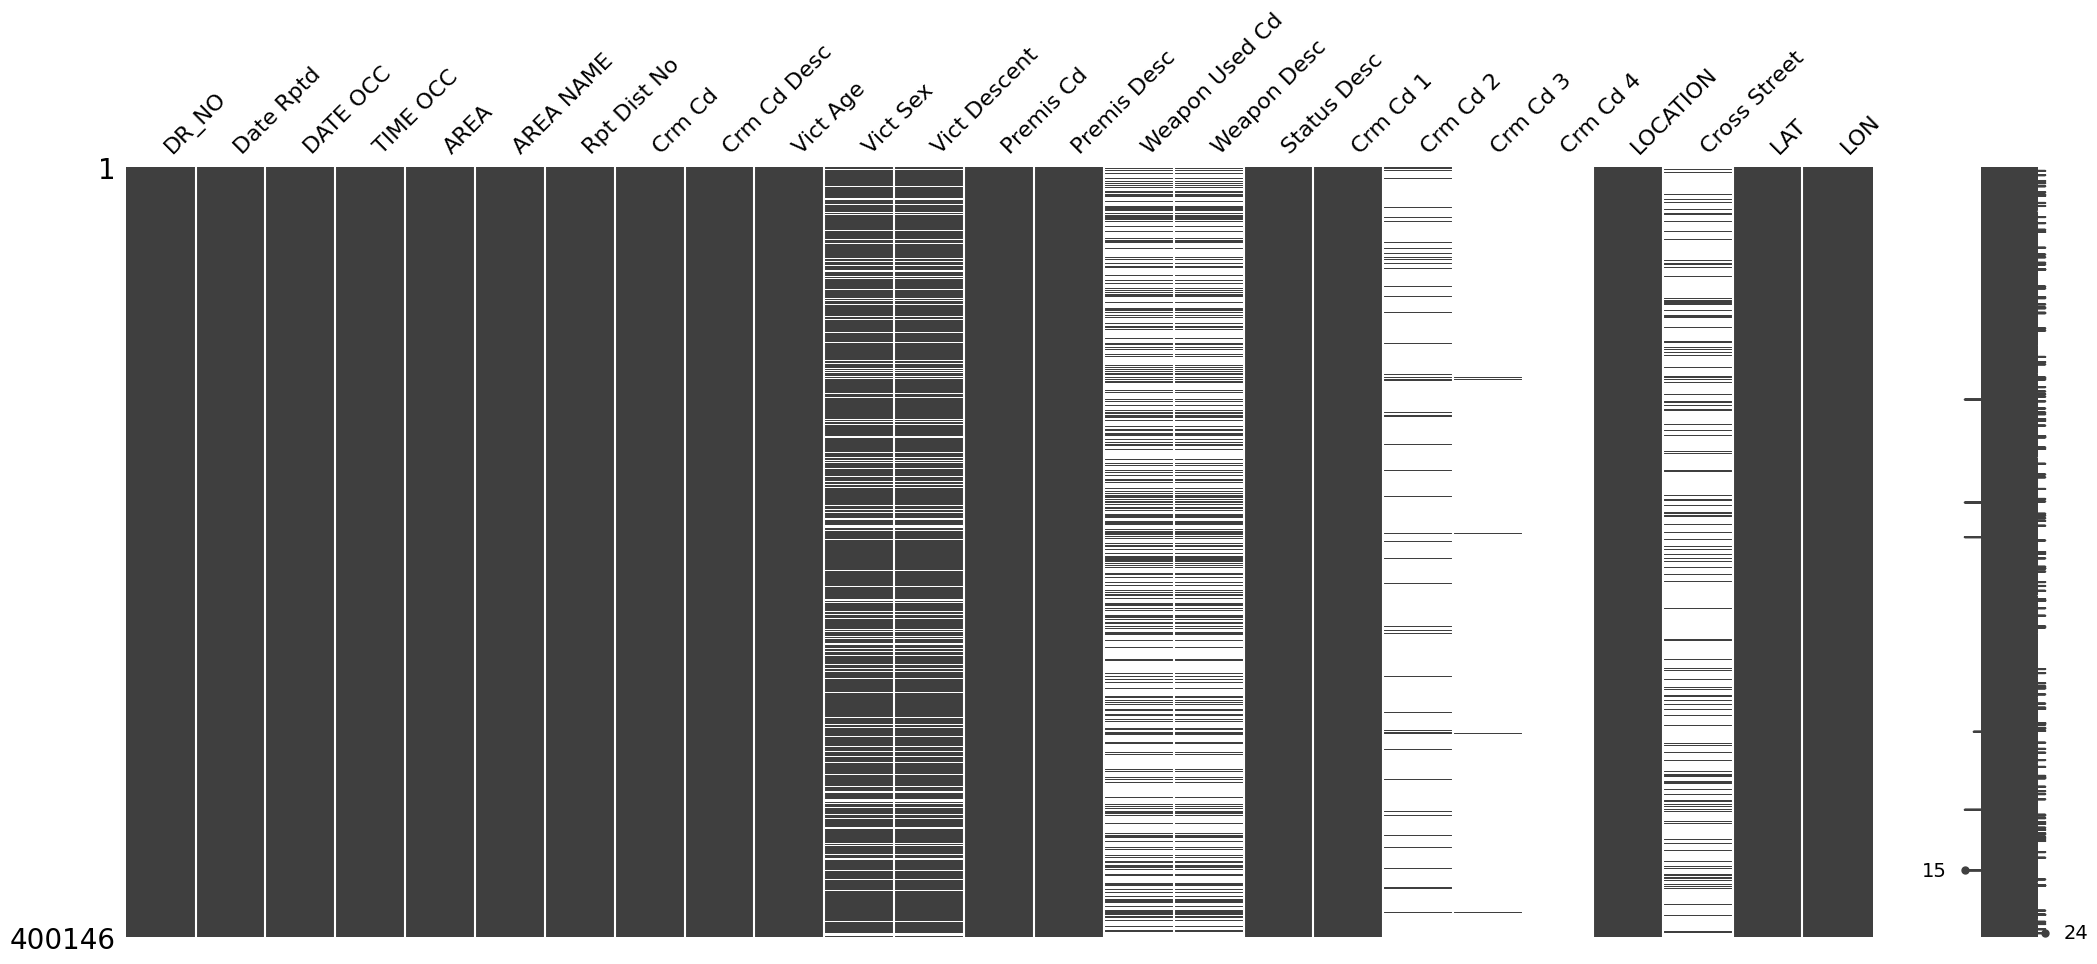

In [11]:
msno.matrix(df)

I decided to use missingno liberary to visualize the number of misssing values in each column to better understand the relationship of missing data between different column.
- First 10 columns which contained the most important information, don't seem to have any missing data as of now. But i need to further investigate this to be sure.
- The seems to be a relationship between missing data in vict_sex and vict_discent columns, which means missing data here is MNAR or the victim refused to disclose that information.
- Same could be said about the weapon used and weapon description columns. Obviously if you don't have (maybe no weapon was used of confiscated) the weapon used you can't describe it. So i will use the weapon code to map it to the descripton to obtain a more readable results instead of plain code.
- Too much missing data in the Cm Cd1, 2, 3 and cross street columns, might as well drop them.
but first we need to inspect those columns.


#### Vict Age
i'll start by plotting the **Vict Age** column. I've decided to use Sturges' Formula to calculate the bins.

In [12]:
import math

# calculating the bins using Sturges
result = math.log2(len(df["Vict Age"]))
print(result)

18.61016696204859


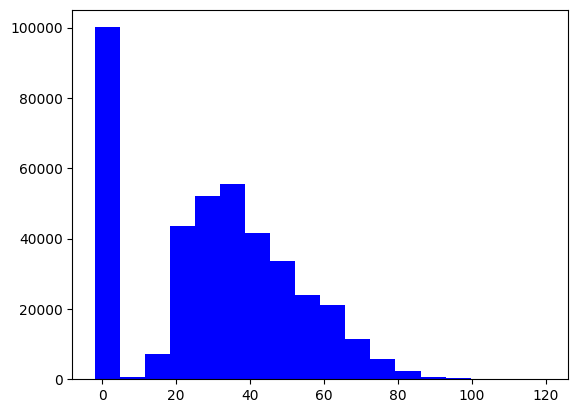

In [13]:
plt.hist(df["Vict Age"], bins=18, color="blue")
plt.show()

Number of age entries are less than 0 years old, so i will filter them out of the data frame.

In [14]:
mask = df["Vict Age"] < 1
df[mask]
print(len(df[mask]))

99860


In [15]:
df = df[~mask]

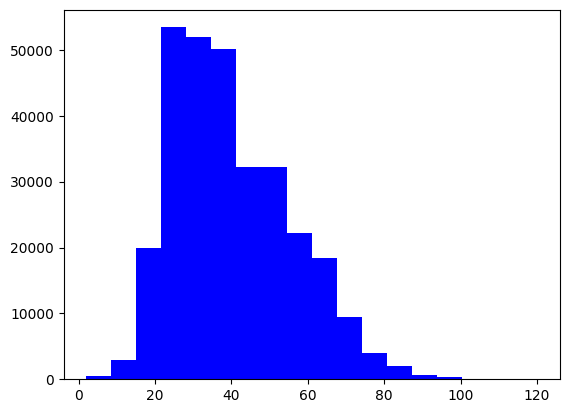

In [16]:
plt.hist(df["Vict Age"], bins=18, color="blue")
plt.show()

Originally this dataframe didn't show itself as having missing data but
There are 99828 enteries this dataFrame where te age of the victims is less than or equal to 0 years old. This isn't possible and i should consider either dropping those values or imputing them.
Still, a significant number of age enteries are equal to or less than 0 years old. which is unexpected.

#### Vict Descent

H (Hispanic/Latin/Mexican) category is by far the highest.

In [17]:
df['Vict Descent'].value_counts()

H    118810
W     76048
B     56372
O     26671
A      8656
X      6514
K      2071
F      1654
C      1546
J       608
V       436
I       384
Z       222
P       120
U        71
L        26
D        24
G        20
S        15
-         1
Name: Vict Descent, dtype: int64

In [18]:
# Drop rows based on a condition in column 'A'
condition = df['Vict Descent'] == '-'  # Specify your condition here

# Use boolean indexing to drop rows that meet the condition
df = df[~condition]

Removing row with '-' values.

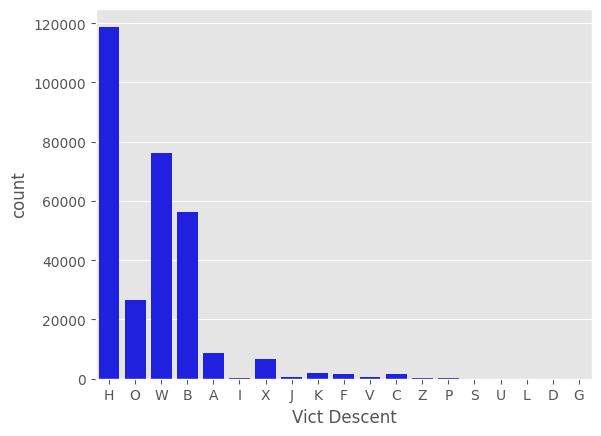

In [19]:
plt.style.use('ggplot')
sns.countplot(x=df["Vict Descent"], color="blue")
plt.show()

#### "DATE OCC" & "Date Rptd"
Time to check the date when a crime was reported and when a crime occured.

In [20]:
incident_counts_occ = df.groupby(["DATE OCC"])["DR_NO"].size().reset_index(name="Count")
incident_counts_rptd = df.groupby(["Date Rptd"])["DR_NO"].size().reset_index(name="Count")

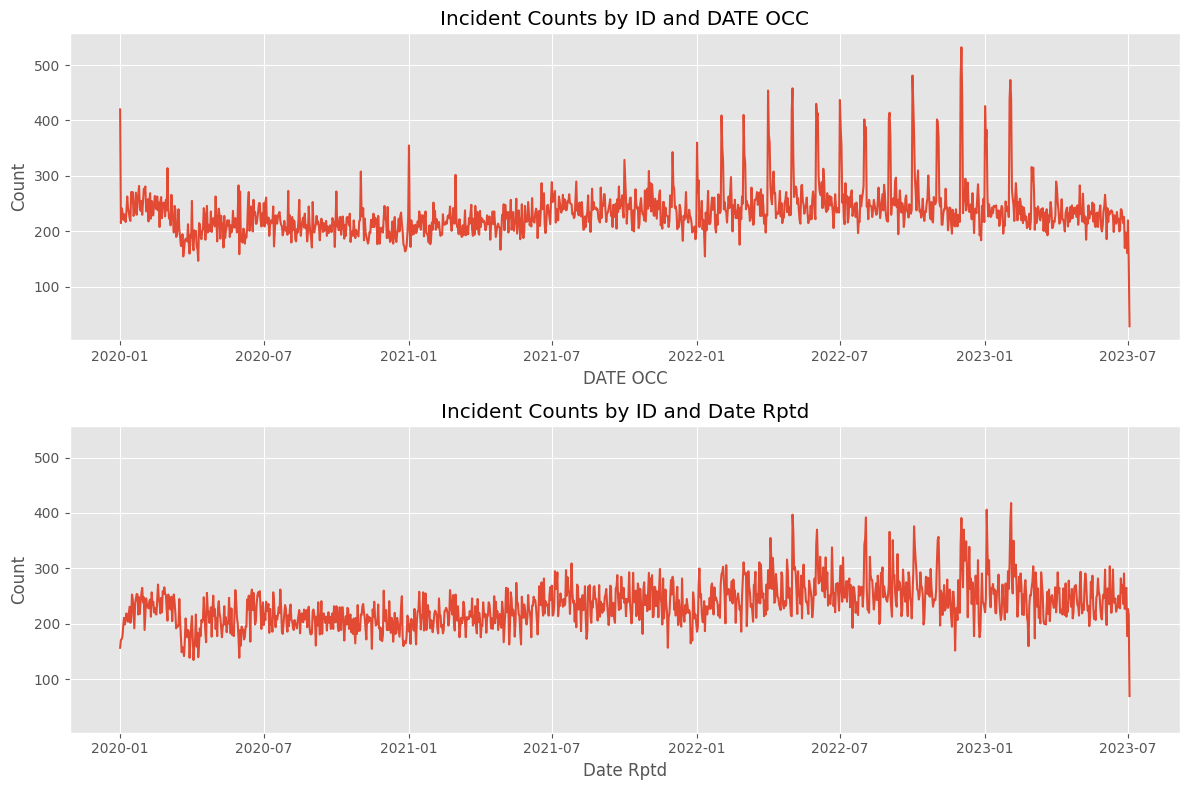

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharey=True)
ax1.plot(incident_counts_occ["DATE OCC"], incident_counts_occ["Count"])
ax1.set_title("Incident Counts by ID and DATE OCC")
ax1.set_xlabel("DATE OCC")
ax1.set_ylabel("Count")

ax2.plot(incident_counts_rptd["Date Rptd"], incident_counts_rptd["Count"])
ax2.set_title("Incident Counts by ID and Date Rptd")
ax2.set_xlabel("Date Rptd")
ax2.set_ylabel("Count")
plt.tight_layout()
plt.show()

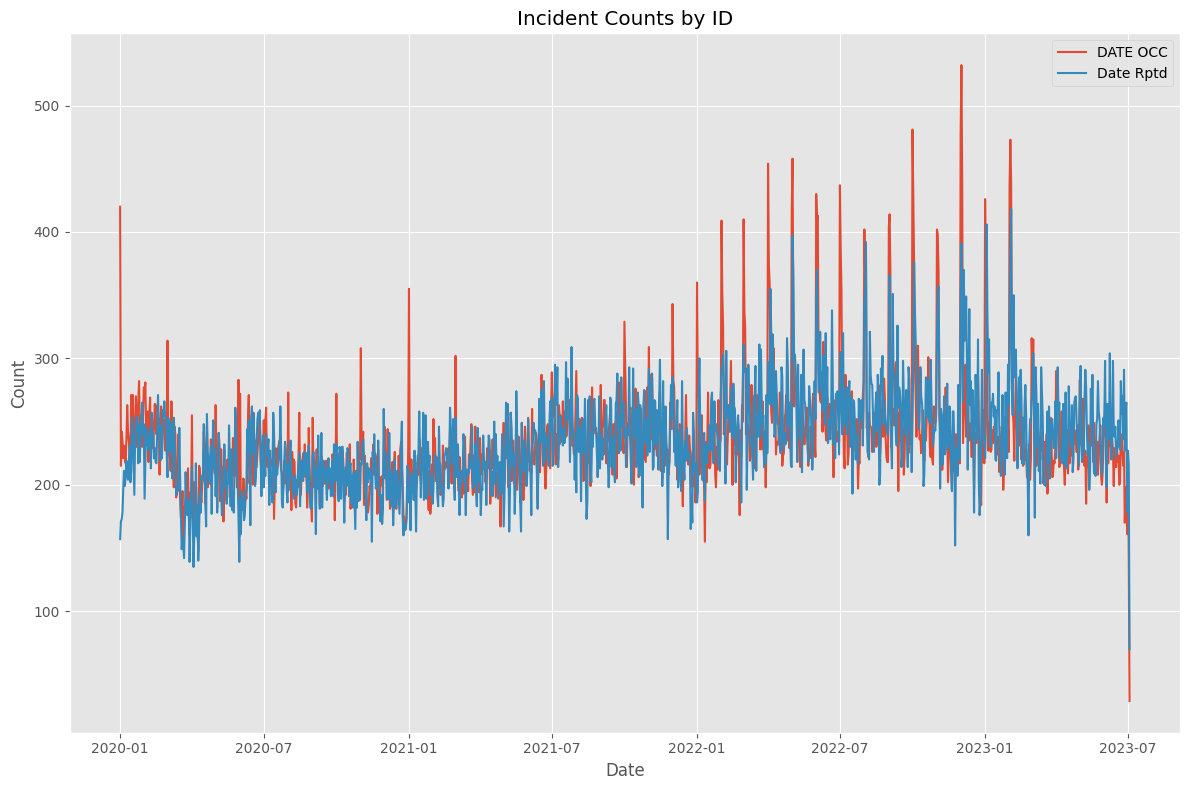

In [22]:
plt.figure(figsize=(12, 8))

# Plot the data for DATE OCC
plt.plot(incident_counts_occ["DATE OCC"], incident_counts_occ["Count"], label="DATE OCC")

# Plot the data for Date Rptd
plt.plot(incident_counts_rptd["Date Rptd"], incident_counts_rptd["Count"], label="Date Rptd")

# Set titles and labels
plt.title("Incident Counts by ID")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()  # Show legend to distinguish between DATE OCC and Date Rptd

plt.tight_layout()
plt.show()

There seems to be a difference between the date when an a crime has occured and when it was reported. i will create a column to calculate that difference.

In [ ]:
df["diff_occ_rptd"] = df["Date Rptd"] - df["DATE OCC"]
df["diff_occ_rptd"].describe()

count                        300285
mean      9 days 22:54:41.738348568
std      54 days 01:35:34.522265681
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 2 days 00:00:00
max              1272 days 00:00:00
Name: diff_occ_rptd, dtype: object

#### "TIME OCC"
Time occ is formated in 24 hour military time:
This column has a lot of poorly formated data that needs to dropped. this are double digit values that are ambigious whether they're mintes or hours.
Note: After additional inspection, turns out the single or two digits values were indeed minutes corresponding to the 00 hour, which is 12 AM.

In [24]:
# Most of crime seems to take place in the late hours of the day
df["TIME OCC"].value_counts()

1200    10508
1800     6977
2000     6622
1700     6587
1900     6030
        ...  
542         5
559         4
431         4
2251        4
534         3
Name: TIME OCC, Length: 1439, dtype: int64

In [25]:
df['TIME OCC'] = df['TIME OCC'].astype(str)

In [26]:
# Add a leading zero for rows with 3 digits
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: x.zfill(4))

# Add a colon between hours and minutes
df['TIME OCC'] = df['TIME OCC'].str[:2] + ':' + df['TIME OCC'].str[2:]

#### "Hour"
Now the TIME OCC column is well formated i will use it to feature a new column called hour. which contains only the 2 digit hour time.

In [27]:
df["hour"] = df['TIME OCC'].str.split(':').str[0]
df["hour"]

0         11
1         03
2         15
3         17
4         15
          ..
400139    13
400140    19
400142    19
400143    06
400144    16
Name: hour, Length: 300285, dtype: object

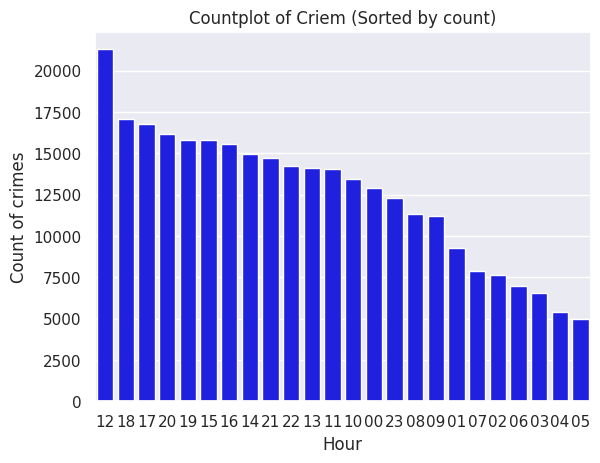

In [28]:
sns.set(style="darkgrid")
sns.countplot(data=df,x="hour", order=df['hour'].value_counts().index, color="blue")
plt.title('Countplot of Criem (Sorted by count)')
plt.xlabel('Hour')
plt.ylabel('Count of crimes')

plt.show()
plt.show()

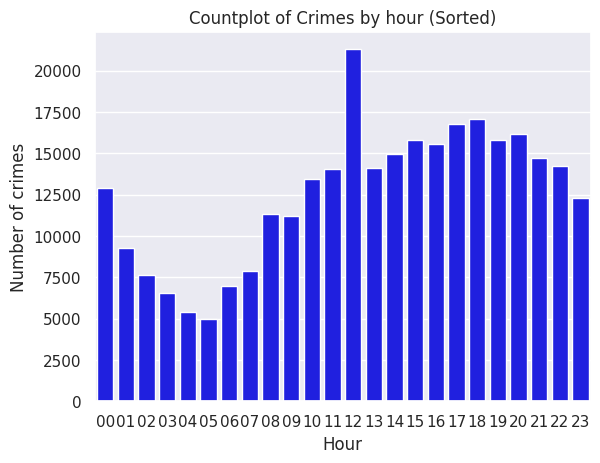

In [29]:
sns.countplot(data=df,x="hour", order=sorted(df['hour'].unique()), color="blue")
plt.title('Countplot of Crimes by hour (Sorted)')
plt.xlabel('Hour')
plt.ylabel('Number of crimes')

plt.show()
plt.show()

#### "Area Code"

In [30]:
df["AREA"].unique()

array([12, 19,  8,  9, 21,  1,  2, 10, 13, 20,  3, 14, 11, 15, 17,  7,  4,
        6,  5, 18, 16])

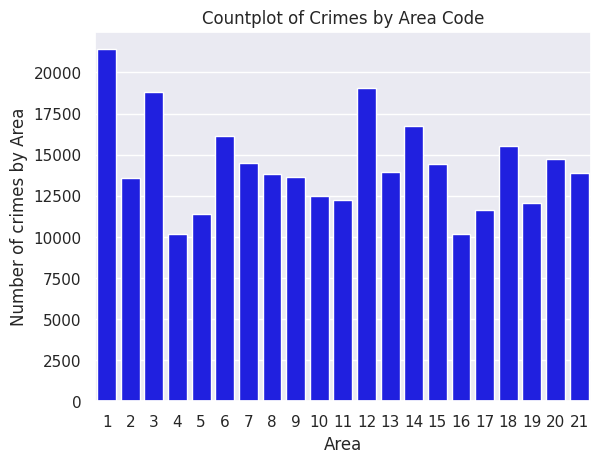

In [31]:
sns.countplot(data=df,x="AREA", order=sorted(df['AREA'].unique()), color="blue")
plt.title('Countplot of Crimes by Area Code')
plt.xlabel('Area')
plt.ylabel('Number of crimes by Area')

plt.show()

#### "Area Name"

The Area Name with the most crimes is the central area, which the corresponding area code 1.

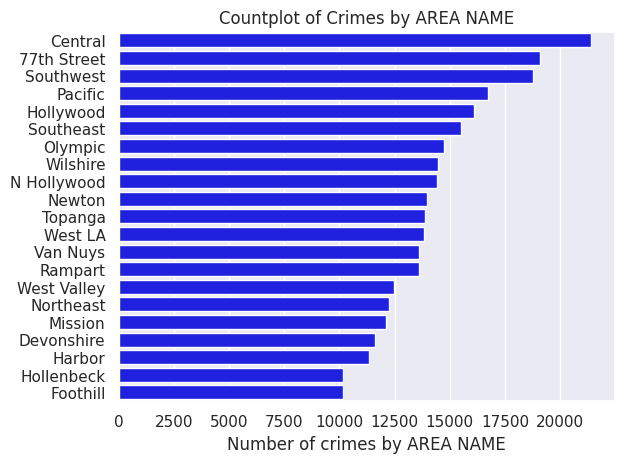

In [32]:
sns.countplot(data=df,y="AREA NAME", order=df['AREA NAME'].value_counts().index, color="blue")
plt.title('Countplot of Crimes by AREA NAME')
plt.xlabel('Number of crimes by AREA NAME')
plt.ylabel('')

plt.show()

#### "Rpt Dist No"
Time to check the "Rpt Dist No" column, this column is supposed to have A four-digit code that represents a sub-area within a Geographic Area.

In [33]:
df["Rpt Dist No"] = df["Rpt Dist No"].astype(str)

In [34]:
# code should be 4 digits, but im seeing values with 3 digits
df["Rpt Dist No"].str.len()

0         4
1         4
2         3
3         3
4         3
         ..
400139    3
400140    3
400142    4
400143    4
400144    4
Name: Rpt Dist No, Length: 300285, dtype: int64

In [35]:
x = df["Rpt Dist No"].str.len()

In [36]:
# Value with 3 digits represent 44% of the data, so i can't drop them.
x.value_counts(normalize=True)

4    0.555865
3    0.444135
Name: Rpt Dist No, dtype: float64

After close examination i've noticed a pattern. codes with 3 digits instead of 4 need to be padded with "0" at the start of the code.

In [37]:
df[["DR_NO", "Rpt Dist No"]].head(15)

,DR_NO,Rpt Dist No
0,201223780,1256
1,201911283,1958
2,200806654,885
3,220912167,955
4,200817110,802
6,200918320,935
7,202106961,2145
8,220808191,829
9,230109590,119
10,200100568,166


i'll use lambda function to achieve this

In [38]:
df['Rpt Dist No'] = df['Rpt Dist No'].apply(lambda x: '0' + x if len(x) == 3 else x)

#### "Crm Cd"

In [39]:
df["Crm Cd"] = df["Crm Cd"].astype(str)

In [40]:
df["Crm Cd"].nunique()

108

In [41]:
# Group by AREA NAME and Crm Cd, then count occurrences
crime_counts = df.groupby(['AREA NAME', 'Crm Cd']).size().reset_index(name='Count')


crime_counts = crime_counts.sort_values(by=['AREA NAME', 'Count'], ascending=[True, False])

# Get the top 5 most common Crime Codes for each AREA NAME
top_5_crime_codes = crime_counts.groupby('AREA NAME').head(5)

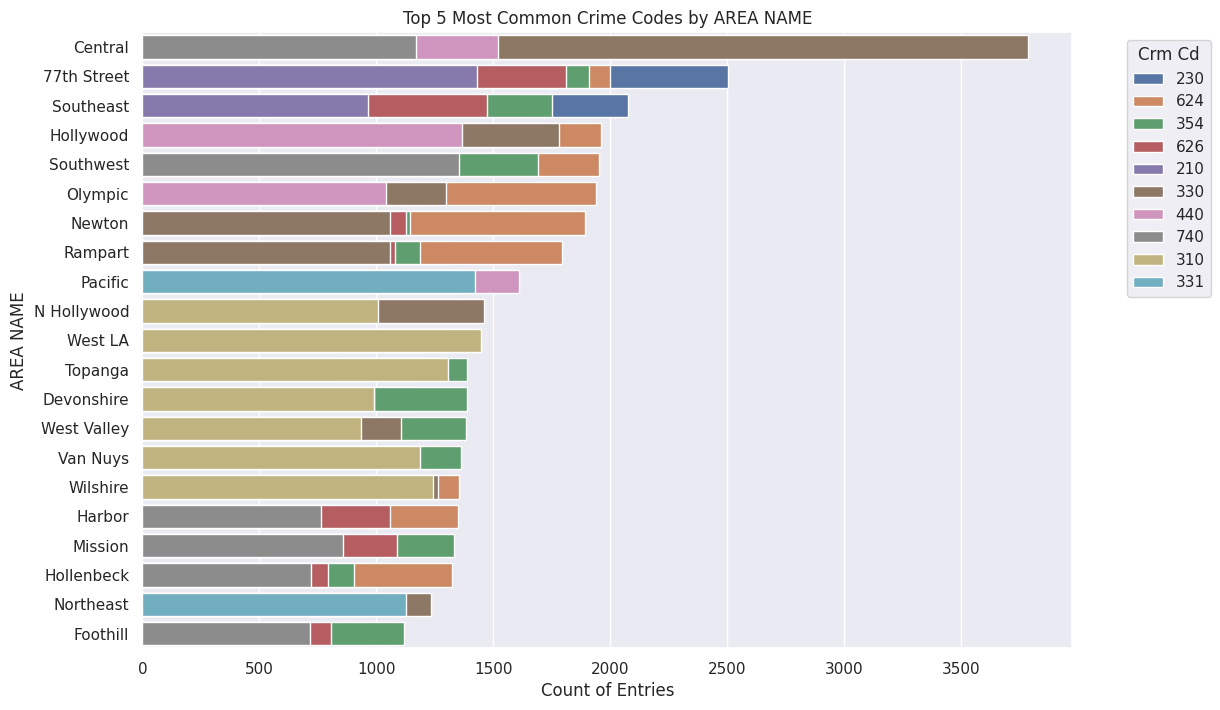

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_crime_codes, x='Count', y='AREA NAME', hue='Crm Cd', dodge=False, order=top_5_crime_codes.sort_values(by='Count', ascending=False)['AREA NAME'].unique())

plt.title('Top 5 Most Common Crime Codes by AREA NAME')
plt.xlabel('Count of Entries')
plt.ylabel('AREA NAME')
plt.legend(title='Crm Cd', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### "Crm Cd Desc".

In [43]:
df["Crm Cd Desc"].nunique()

108

In [44]:
df["Crm Cd Desc"]

0                                                   ROBBERY
1         VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
2           THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
3                            VIOLATION OF RESTRAINING ORDER
4                                        BUNCO, GRAND THEFT
                                ...                        
400139       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
400140                                             BURGLARY
400142    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
400143                                    ATTEMPTED ROBBERY
400144                                    CONTEMPT OF COURT
Name: Crm Cd Desc, Length: 300285, dtype: object

In [45]:
df["Crm Cd Desc"].unique()

array(['ROBBERY',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'VIOLATION OF RESTRAINING ORDER', 'BUNCO, GRAND THEFT',
       'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BURGLARY',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'TRESPASSING',
       'BIKE - STOLEN', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'CONTEMPT OF COURT', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'SHOTS FIRED AT INHABITED DWELLING',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'DISCHARGE FIREARMS/SHOTS FIRED', 'ATTEMPTED ROBBERY',
       'BURGLARY, ATTEMPTED', 'PICKPOCKET',
       'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
       'O

I will try to rename some of the crimes here to reduce redundency and imporve naming convention.

In [46]:
# Create a mapping of cleaned categories
category_mapping = {
 'ROBBERY':'Robbery',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)':'Vandalism',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Auto-Vehicle Theft',
 'VIOLATION OF RESTRAINING ORDER':'Violating restraining order',
 'BUNCO, GRAND THEFT':'Bunco',
 'THEFT OF IDENTITY':'Identity Theft',
 'BURGLARY FROM VEHICLE':'Auto-Vehicle Burglary',
 'INTIMATE PARTNER - SIMPLE ASSAULT':'Domestic Violence',
 'BATTERY - SIMPLE ASSAULT':'Battery',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED':'Criminal Threats',
 'BURGLARY':'Burglary',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Theft',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER':'Violating restraining order',
 'TRESPASSING':'Trespassing',
 'BIKE - STOLEN':'Theft',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Assault',
 'CONTEMPT OF COURT':'Contempt of Court',
 'THEFT PLAIN - PETTY ($950 & UNDER)':'Theft',
 'SHOTS FIRED AT INHABITED DWELLING':'Shooting at an inhabited Dwelling',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT':'Domestic Violence',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)':'Auto-Vehicle Theft',
 'DISCHARGE FIREARMS/SHOTS FIRED':'Firearm Discharge',
 'ATTEMPTED ROBBERY':'Robbery',
 'BURGLARY, ATTEMPTED':'Burglary',
 'PICKPOCKET':'Theft',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)':'Auto-Vehicle Theft',
 'OTHER MISCELLANEOUS CRIME':'Miscellaneous Crime',
 'OTHER ASSAULT':'Assault',
 'BRANDISH WEAPON':'Brandishing a weapon',
 'VIOLATION OF COURT ORDER':'Violating Court Order',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Vandalism',
 'VEHICLE - ATTEMPT STOLEN':'Auto-Vehicle Theft',
 'CRUELTY TO ANIMALS':'Animal Abuse',
 'THREATENING PHONE CALLS/LETTERS':'Criminal Threats',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':'Theft',
 'CRIMINAL HOMICIDE':'Homicide',
 'BATTERY POLICE (SIMPLE)':'Battery',
 'THEFT PLAIN - ATTEMPT':'Theft',
 'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Restraining Order',
 'EXTORTION':'Extortion',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'Embezzlement',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':'Theft',
 'DOCUMENT FORGERY / STOLEN FELONY':'Forgery',
 'BATTERY ON A FIREFIGHTER':'Battery',
 'UNAUTHORIZED COMPUTER ACCESS':'Hacking',
 'KIDNAPPING':'Kidnapping',
 'VEHICLE - STOLEN':'Auto-Vehicle Theft',
 'ORAL COPULATION':'Sexual Assault',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT':'Auto-Vehicle Theft',
 'ARSON':'Arson',
 'THEFT, PERSON':'Theft',
 'BURGLARY FROM VEHICLE, ATTEMPTED':'Auto-Vehicle Theft',
 'BUNCO, PETTY THEFT':'Bunco',
 'FALSE IMPRISONMENT':'False Imprisonment',
 'THROWING OBJECT AT MOVING VEHICLE':'Throwing Objects at moving Vehicles',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Shooting at an occupied Vehicle',
 'DISTURBING THE PEACE':'Disturbing the peace',
 'FAILURE TO YIELD':'traffic infraction',
 'KIDNAPPING - GRAND ATTEMPT':'Kidnapping',
 'BOMB SCARE':'False report',
 'PROWLER':'Stalking',
 'FALSE POLICE REPORT':'False report',
 'THEFT FROM PERSON - ATTEMPT':'Theft',
 'PURSE SNATCHING':'Theft',
 'STALKING':'Stalking',
 'RESISTING ARREST':'Resisting Arrest',
 'CONTRIBUTING':'Contributing',
 'BUNCO, ATTEMPT':'Bunco',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)':'Driving without owner conset',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':'Assault',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Fraud',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Forgery',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Embezzlement',
 'BLOCKING DOOR INDUCTION CENTER':'Blocking Door Induction',
 'PANDERING':'Prostitution',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':'Fraud',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Human Trafficking',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':'Theft',
 'RECKLESS DRIVING':'Reckless Driving',
 'ILLEGAL DUMPING':'Illegal Dumping',
 'DISHONEST EMPLOYEE - GRAND THEFT':'Dishonest Employee',
 'DISHONEST EMPLOYEE - PETTY THEFT':'Dishonest Employee',
 'PURSE SNATCHING - ATTEMPT':'Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':'Defrauding an Innkeeper',
 'SHOPLIFTING - ATTEMPT':'Theft',
 'COUNTERFEIT':'Counterfitting',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT':'Dishonest Employee',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':'Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':'Defrauding an Innkeeper',
 'MANSLAUGHTER, NEGLIGENT':'Manslaughter',
 'WEAPONS POSSESSION/BOMBING':'Weapon Possesion',
 'TILL TAP - PETTY ($950 & UNDER)':'Theft',
 'DRUNK ROLL':'Theft',
 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':'FIREARMS EMERGENCY PROTECTIVE ORDER',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)':'Theft',
 'CONSPIRACY':'Conspiracy',
 'BRIBERY':'Bribery',
 'GRAND THEFT / INSURANCE FRAUD':'Fraud',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
 'BIGAMY':'Bigamy',
 'TELEPHONE PROPERTY - DAMAGE':'Vandalism',
 'THEFT, COIN MACHINE - ATTEMPT':'Theft',
 'PICKPOCKET, ATTEMPT':'Theft',
 'DOCUMENT WORTHLESS ($200 & UNDER)':'Forgery',
 'DISRUPT SCHOOL':'Disrupt School',
 'LYNCHING':'Lynching',
 'BIKE - ATTEMPTED STOLEN':'Theft',
 'PETTY THEFT - AUTO REPAIR':'Theft'
}

In [47]:
df['Crm Cd Desc'].nunique()

108

#### "Cleaned Crm Cd Desc"

In [48]:
df['Cleaned Crm Cd Desc'] = df['Crm Cd Desc'].map(category_mapping)

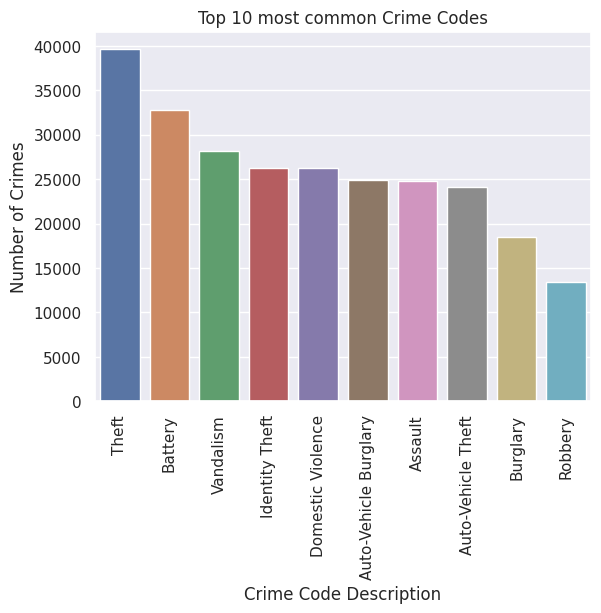

In [49]:
sns.barplot(x=df['Cleaned Crm Cd Desc'].value_counts().head(10).index, y=df['Cleaned Crm Cd Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
plt.xlabel('Crime Code Description')
plt.title("Top 10 most common Crime Codes")

plt.xticks(rotation=90)

plt.show()

#### "Crime Severity":
I'll Create a new colum called severity, which will contain values from the Crm Cd Desc column on whether the crime was an attempt, felony or Grand. I'll use information from google to come up with this classification.

In [50]:
# Create a mapping of cleaned severity
severity_mapping = {
 'ROBBERY':'Felony',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)':'Felony',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)':'Petty',
 'VIOLATION OF RESTRAINING ORDER':'Unknown',
 'BUNCO, GRAND THEFT':'Grand Theft',
 'THEFT OF IDENTITY':'Felony',
 'BURGLARY FROM VEHICLE':'Felony',
 'INTIMATE PARTNER - SIMPLE ASSAULT':'Simple Assault',
 'BATTERY - SIMPLE ASSAULT':'Simple Assault',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED':'Felony',
 'BURGLARY':'Felony',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':'Grand Theft',
 'VIOLATION OF TEMPORARY RESTRAINING ORDER':'Unknown',
 'TRESPASSING':'Misdemeanor',
 'BIKE - STOLEN':'Petty',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':'Aggravated Assault',
 'CONTEMPT OF COURT':'Misdemeanor',
 'THEFT PLAIN - PETTY ($950 & UNDER)':'Petty',
 'SHOTS FIRED AT INHABITED DWELLING':'Felony',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT':'Aggravated Assault',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)':'Grand Theft',
 'DISCHARGE FIREARMS/SHOTS FIRED':'Felony',
 'ATTEMPTED ROBBERY':'Attempted',
 'BURGLARY, ATTEMPTED':'Attempted',
 'PICKPOCKET':'Petty',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)':'Grand Theft',
 'OTHER MISCELLANEOUS CRIME':'Unknown',
 'OTHER ASSAULT':'Unknown',
 'BRANDISH WEAPON':'Felony',
 'VIOLATION OF COURT ORDER':'Misdemeanor',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Misdemeanor',
 'VEHICLE - ATTEMPT STOLEN':'Attempted',
 'CRUELTY TO ANIMALS':'Unknown',
 'THREATENING PHONE CALLS/LETTERS':'Misdemeanor',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':'Petty',
 'CRIMINAL HOMICIDE':'Felony',
 'BATTERY POLICE (SIMPLE)':'Simple Assault',
 'THEFT PLAIN - ATTEMPT':'Attempted',
 'FIREARMS RESTRAINING ORDER (FIREARMS RO)':'Felony',
 'EXTORTION':'Felony',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'DOCUMENT FORGERY / STOLEN FELONY':'Felony',
 'BATTERY ON A FIREFIGHTER':'Felony',
 'UNAUTHORIZED COMPUTER ACCESS':'Felony',
 'KIDNAPPING':'Felony',
 'VEHICLE - STOLEN':'Grand Theft',
 'ORAL COPULATION':'Felony',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT':'Attempted',
 'ARSON':'Felony',
 'THEFT, PERSON':'Felony',
 'BURGLARY FROM VEHICLE, ATTEMPTED':'Attempted',
 'BUNCO, PETTY THEFT':'Petty',
 'FALSE IMPRISONMENT':'Felony',
 'THROWING OBJECT AT MOVING VEHICLE':'Felony',
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':'Felony',
 'DISTURBING THE PEACE':'Misdemeanor',
 'FAILURE TO YIELD':'Misdemeanor',
 'KIDNAPPING - GRAND ATTEMPT':'Attempted',
 'BOMB SCARE':'Felony',
 'PROWLER':'Unknown',
 'FALSE POLICE REPORT':'Misdemeanor',
 'THEFT FROM PERSON - ATTEMPT':'Attempted',
 'PURSE SNATCHING':'Petty',
 'STALKING':'Felony',
 'RESISTING ARREST':'Misdemeanor',
 'CONTRIBUTING':'Unknown',
 'BUNCO, ATTEMPT':'Attempted',
 'DRIVING WITHOUT OWNER CONSENT (DWOC)':'Unknown',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':'Aggravated Assault',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER':'Petty',
 'DOCUMENT WORTHLESS ($200.01 & OVER)':'Felony',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':'Petty',
 'BLOCKING DOOR INDUCTION CENTER':'Misdemeanor',
 'PANDERING':'Felony',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':'Felony',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':'Felony',
 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':'Petty',
 'RECKLESS DRIVING':'Misdemeanor',
 'ILLEGAL DUMPING':'Misdemeanor',
 'DISHONEST EMPLOYEE - GRAND THEFT':'Grand Theft',
 'DISHONEST EMPLOYEE - PETTY THEFT':'Petty',
 'PURSE SNATCHING - ATTEMPT':'Attempted',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':'Grand Theft',
 'SHOPLIFTING - ATTEMPT':'Attempted',
 'COUNTERFEIT':'Felony',
 'DISHONEST EMPLOYEE ATTEMPTED THEFT':'Attempted',
 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':'Grand Theft',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':'Petty',
 'MANSLAUGHTER, NEGLIGENT':'Felony',
 'WEAPONS POSSESSION/BOMBING':'Felony',
 'TILL TAP - PETTY ($950 & UNDER)':'Petty',
 'DRUNK ROLL':'Misdemeanor',
 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':'Felony',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)':'Grand Theft',
 'CONSPIRACY':'Felony',
 'BRIBERY':'Felony',
 'GRAND THEFT / INSURANCE FRAUD':'Grand Theft',
 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':'Felony',
 'BIGAMY':'Felony',
 'TELEPHONE PROPERTY - DAMAGE':'Felony',
 'THEFT, COIN MACHINE - ATTEMPT':'Attempted',
 'PICKPOCKET, ATTEMPT':'Attempted',
 'DOCUMENT WORTHLESS ($200 & UNDER)':'Misdemeanor',
 'DISRUPT SCHOOL':'Misdemeanor',
 'LYNCHING':'Felony',
 'BIKE - ATTEMPTED STOLEN':'Attempted',
 'PETTY THEFT - AUTO REPAIR':'Petty'
}

In [51]:
df['Crime Severity'] = df['Crm Cd Desc'].map(severity_mapping)

Seems like Females tend to get involved in less violent and serious crimes than Males

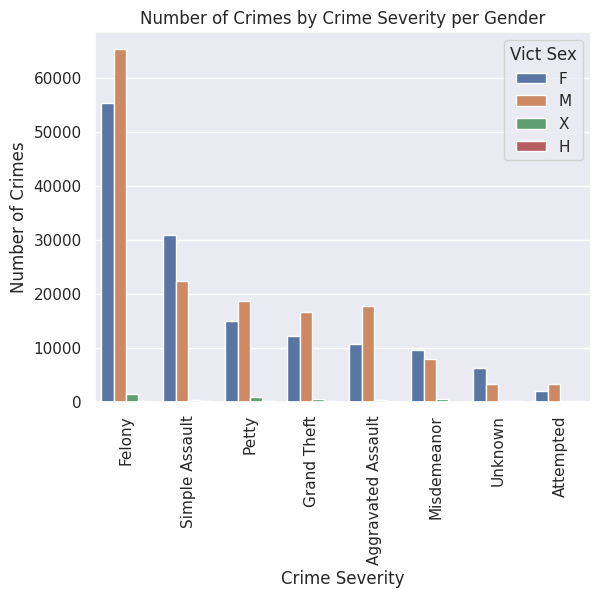

In [52]:
severity_counts = df['Crime Severity'].value_counts().sort_values(ascending=False).index

sns.countplot(x="Crime Severity", data=df, hue="Vict Sex", order=severity_counts)

plt.ylabel("Number of Crimes")
plt.xlabel("Crime Severity")
plt.title("Number of Crimes by Crime Severity per Gender")
plt.xticks(rotation=90)
plt.show()

In [53]:
df['Crime Severity'].value_counts()

Felony                121986
Simple Assault         53315
Petty                  34500
Grand Theft            29236
Aggravated Assault     28545
Misdemeanor            17886
Unknown                 9475
Attempted               5342
Name: Crime Severity, dtype: int64

#### "Vict Sex"

In [54]:
df["Vict Sex"] = df["Vict Sex"].str.replace('H', 'X')

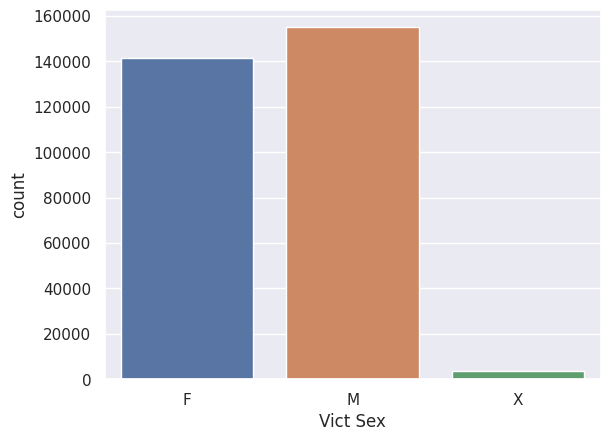

In [55]:
sns.countplot(x="Vict Sex", data=df)
plt.show()

In [56]:
df = df[df["Vict Sex"] != 'X']

In [57]:
df.dropna(subset=['Vict Sex', 'Vict Descent'], inplace=True)

In [58]:
df.isnull().sum()

DR_NO                       0
Date Rptd                   0
DATE OCC                    0
TIME OCC                    0
AREA                        0
AREA NAME                   0
Rpt Dist No                 0
Crm Cd                      0
Crm Cd Desc                 0
Vict Age                    0
Vict Sex                    0
Vict Descent                0
Premis Cd                   0
Premis Desc                79
Weapon Used Cd         172722
Weapon Desc            172722
Status Desc                 0
Crm Cd 1                    2
Crm Cd 2               274855
Crm Cd 3               295765
Crm Cd 4               296496
LOCATION                    0
Cross Street           248002
LAT                         0
LON                         0
diff_occ_rptd               0
hour                        0
Cleaned Crm Cd Desc         0
Crime Severity              0
dtype: int64

#### "Premis Cd"

In [59]:
df["Premis Desc"] = df["Premis Desc"].astype(str)

The original Premis Desc column contains almost 300 unique values, which is going to be hard to visualize and analyze. Which is why i've decided to reduce the number of unique values in this column, by creating 41 new more readable and concise categories.

In [60]:
premis_cat_mapping = {
    'SIDEWALK': 'Outdoor',
    'Restaurant/Fast Food': 'Food Establishment',
    'Park/Playground': 'Outdoor',
    'Apartment/Condo': 'Residential',
    'Residential': 'Residential',
    'MARKET': 'Food Establishment',
    'LA UNION STATION (NOT LINE SPECIFIC)': 'Transportation',
    'MTA BUS': 'Public Transportation',
    'VEHICLE, PASSENGER/TRUCK': 'Vehicle',
    'OTHER BUSINESS': 'Business',
    'STREET': 'Street',
    'CYBERSPACE': 'Cyberspace',
    'OTHER/OUTSIDE': 'Outdoor',
    'GARAGE/CARPORT': 'Residential',
    'OTHER PREMISE': 'Other',
    'HOTEL': 'Lodging',
    'Store': 'Retail',
    'BAR/COCKTAIL/NIGHTCLUB': 'Entertainment',
    'DRIVEWAY': 'Residential',
    'YARD (RESIDENTIAL/BUSINESS)': 'Residential',
    'NIGHT CLUB (OPEN EVENINGS ONLY)': 'Entertainment',
    'MINI-MART': 'Food Establishment',
    'AUTOMATED TELLER MACHINE (ATM)': 'Financial Institution',
    "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS": 'Residential',
    'School': 'Educational',
    'ALLEY': 'Street',
    'NURSING/CONVALESCENT/RETIREMENT HOME': 'Healthcare',
    'PATIO*': 'Outdoor',
    'OTHER RESIDENCE': 'Residential',
    'BANK': 'Financial Institution',
    'GAS STATION': 'Gas Station',
    'PORCH, RESIDENTIAL': 'Residential',
    'MOTEL': 'Lodging',
    'CAR WASH': 'Automotive',
    'WEBSITE': 'Online',
    'MEDICAL/DENTAL OFFICES': 'Healthcare',
    'MTA - ORANGE LINE - WOODMAN': 'Public Transportation',
    'CONVENTION CENTER': 'Entertainment',
    'Hospital': 'Healthcare',
    'PUBLIC STORAGE': 'Storage',
    'TRANSPORTATION FACILITY (AIRPORT)': 'Transportation',
    'SPORTS VENUE, OTHER': 'Entertainment',
    'MTA - RED LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'SLIPS/DOCK/MARINA/BOAT': 'Marina',
    'OFFICE BUILDING/OFFICE': 'Office',
    '7TH AND METRO CENTER (NOT LINE SPECIFIC)': 'Public Transportation',
    'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'Entertainment',
    'DODGER STADIUM': 'Entertainment',
    'BUS STOP': 'Public Transportation',
    'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'Entertainment',
    'MAIL BOX': 'Mail Services',
    'CONDOMINIUM/TOWNHOUSE': 'Residential',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)": 'Retail',
    'HEALTH SPA/GYM': 'Healthcare',
    'STAIRWELL*': 'Residential',
    'ABANDONED BUILDING ABANDONED HOUSE': 'Residential',
    'VALET': 'Parking',
    'MTA - RED LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - RED LINE - UNION STATION': 'Public Transportation',
    'TRANSIENT ENCAMPMENT': 'Outdoor',
    'THE BEVERLY CENTER': 'Retail',
    'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'Residential',
    'FIRE STATION': 'Public Services',
    'STORAGE SHED': 'Storage',
    'TV/RADIO/APPLIANCE': 'Retail',
    'GROUP HOME': 'Residential',
    "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME": 'Residential',
    'VACANT LOT': 'Outdoor',
    'MISSIONS/SHELTERS': 'Residential',
    'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'Educational',
    'COLISEUM': 'Entertainment',
    'TERMINAL, OTHER THAN MTA': 'Transportation',
    'MTA - RED LINE - HOLLYWOOD/VINE': 'Public Transportation',
    'DETENTION/JAIL FACILITY': 'Public Services',
    'BEACH': 'Outdoor',
    'THEATRE/MOVIE': 'Entertainment',
    'WAREHOUSE': 'Storage',
    'BALCONY*': 'Residential',
    'GARMENT MANUFACTURER': 'Manufacturing',
    "VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)": 'Vehicle',
    'SPORTS ARENA': 'Entertainment',
    'CHECK CASHING*': 'Financial Institution',
    'THE GROVE': 'Retail',
    'MTA - RED LINE - VERMONT/SUNSET': 'Public Transportation',
    'TAXI': 'Vehicle',
    'DRIVE THRU*': 'Food Establishment',
    'LAUNDROMAT': 'Retail',
    'LIBRARY': 'Educational',
    'POLICE FACILITY': 'Public Services',
    'CONSTRUCTION SITE': 'Construction',
    'NAIL SALON': 'Beauty',
    'NAN': 'Other',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)': 'Religious',
    'MTA - EXPO LINE - EXPO/VERMONT': 'Public Transportation',
    'THE BEVERLY CONNECTION': 'Retail',
    'METROLINK TRAIN': 'Public Transportation',
    'MTA - GREEN LINE - AVALON': 'Public Transportation',
    'POST OFFICE': 'Mail Services',
    'MTA - BLUE LINE - 103RD/WATTS TOWERS': 'Public Transportation',
    'SHORT-TERM VACATION RENTAL': 'Lodging',
    'SYNAGOGUE/TEMPLE':"Religious",
    'MTA - GOLD LINE - UNION STATION': 'Public Transportation',
    'GUN/SPORTING GOODS': 'Retail',
    'MUSEUM': 'Entertainment',
    'MTA - BLUE LINE - VERNON': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/WESTERN': 'Public Transportation',
    'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'Automotive',
    'TOOL SHED*': 'Residential',
    'MANUFACTURING COMPANY': 'Manufacturing',
    'TATTOO PARLOR*': 'Beauty',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)': 'Government',
    'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE': 'Public Transportation',
    'ELEVATOR': 'Residential',
    'TOW YARD*': 'Automotive',
    'PROJECT/TENEMENT/PUBLIC HOUSING': 'Residential',
    'MTA - RED LINE - VERMONT/BEVERLY': 'Public Transportation',
    'MTA - GREEN LINE - HARBOR FWY': 'Public Transportation',
    'CREDIT UNION': 'Financial Institution',
    'RECYCLING CENTER': 'Recycling',
    'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'Public Transportation',
    'MTA - RED LINE - HOLLYWOOD/HIGHLAND': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/CRENSHAW': 'Public Transportation',
    'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY': 'Public Transportation',
    'HARDWARE/BUILDING SUPPLY': 'Retail',
    'DAY CARE/ADULTS*': 'Childcare',
    'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'Healthcare',
    'MTA - EXPO LINE - EXPO/WESTERN': 'Public Transportation',
    'MTA - GREEN LINE - AVIATION/LAX': 'Public Transportation',
    'FREEWAY': 'Street',
    'BUS-CHARTER/PRIVATE': 'Public Transportation',
    'BUS DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'PUBLIC RESTROOM/OUTSIDE*': 'Public Restroom',
    'MTA - EXPO LINE - JEFFERSON/USC': 'Public Transportation',
    'AUTO SALES LOT': 'Automotive',
    'MTA - RED LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'POOL-PUBLIC/OUTDOOR OR INDOOR*': 'Entertainment',
    'MTA - SILVER LINE - HARBOR GATEWAY TRANSIT CTR': 'Public Transportation',
    'MTA - BLUE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'FACTORY': 'Manufacturing',
    'UNDERPASS/BRIDGE*': 'Street',
    'FINANCE COMPANY': 'Financial Institution',
    'GOLF COURSE*': 'Recreation',
    'BOWLING ALLEY*': 'Recreation',
    'MASSAGE PARLOR': 'Beauty',
    'MTA - RED LINE - VERMONT/SANTA MONICA': 'Public Transportation',
    'MTA - RED LINE - PERSHING SQUARE': 'Public Transportation',
    'MTA - BLUE LINE - WASHINGTON': 'Public Transportation',
    'RIVER BED*': 'Outdoor',
    'GREYHOUND OR INTERSTATE BUS': 'Public Transportation',
    'MTA - BLUE LINE - PICO': 'Public Transportation',
    'CATERING/ICE CREAM TRUCK': 'Food Establishment',
    'MTA - BLUE LINE - SAN PEDRO': 'Public Transportation',
    'CLEANER/LAUNDROMAT': 'Retail',
    'TRAIN TRACKS': 'Transportation',
    'MTA - PURPLE LINE - WILSHIRE/WESTERN': 'Public Transportation',
    'MTA - ORANGE LINE - VAN NUYS': 'Public Transportation',
    'FOSTER HOME BOYS OR GIRLS*': 'Residential',
    'MTA - ORANGE LINE - BALBOA': 'Public Transportation',
    'AMTRAK TRAIN': 'Public Transportation',
    'HIGH-RISE BUILDING': 'Residential',
    'VISION CARE FACILITY*': 'Healthcare',
    'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*': 'Delivery Service',
    'ESCALATOR*': 'Transportation',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)': 'Entertainment',
    'STAPLES CENTER *': 'Entertainment',
    'MTA - EXPO LINE - EXPO/LA BREA': 'Public Transportation',
    'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)': 'Public Transportation',
    'MTA - SILVER LINE - MANCHESTER': 'Public Transportation',
    'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 'Financial Institution',
    'PUBLIC RESTROOM(INDOORS-INSIDE)': 'Public Restroom',
    'BUS STOP/LAYOVER (ALSO QUERY 124)': 'Public Transportation',
    'MTA - EXPO LINE - FARMDALE': 'Public Transportation',
    'MTA - GOLD LINE - CHINATOWN': 'Public Transportation',
    'MTA - EXPO LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'ENERGY PLANT/FACILITY': 'Energy Plant',
    'MTA - EXPO LINE - EXPO/BUNDY': 'Public Transportation',
    'OTHER RR TRAIN (UNION PAC, SANTE FE ETC': 'Transportation',
    'MTA - ORANGE LINE - ROSCOE': 'Public Transportation',
    'SWAP MEET': 'Retail',
    'AIRCRAFT': 'Transportation',
    'MTA - GOLD LINE - SOTO': 'Public Transportation',
    'MTA - EXPO LINE - LA CIENEGA/JEFFERSON': 'Public Transportation',
    'MTA - ORANGE LINE - NORTH HOLLYWOOD': 'Public Transportation',
    'PEDESTRIAN OVERCROSSING': 'Transportation',
    'MTA - ORANGE LINE - RESEDA': 'Public Transportation',
    'MTA - EXPO LINE - PALMS': 'Public Transportation',
    'OTHER PLACE OF WORSHIP': 'Religious',
    'CEMETARY*': 'Religious',
    'BASKETBALL COURTS': 'Recreation',
    'MTA - GOLD LINE - MARIACHI PLAZA': 'Public Transportation',
    'MTA - BLUE LINE - GRAND/LATTC': 'Public Transportation',
    'FRAT HOUSE/SORORITY/DORMITORY': 'Residential',
    'SAVINGS & LOAN': 'Financial Institution',
    'TRUCK, COMMERICAL': 'Vehicle',
    'MTA - GOLD LINE - LINCOLN/CYPRESS': 'Public Transportation',
    'MTA - SILVER LINE - SLAUSON': 'Public Transportation',
    'DAY CARE/CHILDREN*': 'Childcare',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT': 'Public Transportation',
    'MTA - EXPO LINE - PICO': 'Public Transportation',
    'DRIVE THRU BANKING (WINDOW)*': 'Financial Institution',
    'TELECOMMUNICATION FACILITY/LOCATION': 'Telecommunication',
    'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 'Entertainment',
    'MOSQUE*': 'Religious',
    'ABORTION CLINIC/ABORTION FACILITY*': 'Healthcare',
    'EQUIPMENT RENTAL': 'Retail',
    'DAM/RESERVOIR': 'Infrastructure',
    'MTA - PURPLE LINE - 7TH AND METRO CENTER': 'Public Transportation',
    'MORTUARY': 'Funeral Services',
    'MTA - ORANGE LINE - TAMPA': 'Public Transportation',
    'MTA - EXPO LINE - EXPO/SEPULVEDA': 'Public Transportation',
    'MTA - ORANGE LINE - VALLEY COLLEGE': 'Public Transportation',
    'TRAIN DEPOT/TERMINAL, OTHER THAN MTA': 'Public Transportation',
    'MTA - ORANGE LINE - PIERCE COLLEGE': 'Public Transportation',
    'METHADONE CLINIC': 'Healthcare',
    'MTA - ORANGE LINE - DE SOTO': 'Public Transportation',
    'MTA - GOLD LINE - HERITAGE SQ': 'Public Transportation',
    'MTA - ORANGE LINE - NORDHOFF': 'Public Transportation',
    'MTA - PURPLE LINE - WILSHIRE/NORMANDIE': 'Public Transportation',
    'MTA - ORANGE LINE - LAUREL CANYON': 'Public Transportation',
    'TUNNEL': 'Transportation',
    'MTA - GOLD LINE - PICO/ALISO': 'Public Transportation',
    'MTA - PURPLE LINE - PERSHING SQUARE': 'Public Transportation',
    'CULTURAL SIGNIFICANCE/MONUMENT': 'Entertainment',
    'WATER FACILITY': 'Infrastructure',
    'MTA - ORANGE LINE - WOODLEY': 'Public Transportation',
    'MTA - ORANGE LINE - SEPULVEDA': 'Public Transportation',
    'TRASH CAN/TRASH DUMPSTER': 'Waste Management',
    'HOSPICE': 'Healthcare',
    'PAY PHONE': 'Telecommunication',
    'MASS GATHERING LOCATION': 'Entertainment',
    'MTA - GOLD LINE - SOUTHWEST MUSEUM': 'Public Transportation',
    'MTA - GOLD LINE - INDIANA': 'Public Transportation',
    'MTA - ORANGE LINE - CANOGA': 'Public Transportation',
    'MTA - ORANGE LINE - CHATSWORTH': 'Public Transportation',
    'MTA - ORANGE LINE - SHERMAN WAY': 'Public Transportation',
    'COMPUTER SERVICES/REPAIRS/SALES': 'Technology',
    'MTA - SILVER LINE - LAC/USC MEDICAL CENTER': 'Public Transportation',
    'MUSCLE BEACH': 'Recreation',
    'HARBOR FRWY STATION (NOT LINE SPECIFIC)': 'Public Transportation',
    'MTA - SILVER LINE - UNION STATION': 'Public Transportation',
    'OTHER INTERSTATE, CHARTER BUS': 'Public Transportation',
    'CHEMICAL STORAGE/MANUFACTURING PLANT': 'Manufacturing',
    'ABATEMENT LOCATION': 'Other',
    'MTA - SILVER LINE - PACIFIC COAST HWY': 'Public Transportation',
    'MTA - SILVER LINE - HARBOR FWY': 'Public Transportation',
    'SKATING RINK*': 'Recreation',
    'RETIRED (DUPLICATE) DO NOT USE THIS CODE': 'Other',
    'MTA - SILVER LINE - 37TH ST/USC': 'Public Transportation',
    'OIL REFINERY': 'Manufacturing',
    'HOCKEY RINK/ICE HOCKEY': 'Recreation',
    'MTA - PURPLE LINE - UNION STATION': 'Public Transportation',
    'MTA - SILVER LINE - ROSECRANS': 'Public Transportation',
     'RESTAURANT/FAST FOOD': 'Food Establishment',
    'PARKING LOT': 'Parking',
    'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'Residential',
    'SINGLE FAMILY DWELLING': 'Residential',
    'PARK/PLAYGROUND': 'Outdoor',
    'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*': 'Retail',
    'LIQUOR STORE': 'Retail',
    'PARKING UNDERGROUND/BUILDING': 'Parking',
    'DEPARTMENT STORE': 'Retail',
    'ELEMENTARY SCHOOL': 'Educational',
    'DRUG STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)': 'Retail',
    'JUNIOR HIGH SCHOOL': 'Educational',
    'OTHER STORE': 'Retail',
    'HIGH SCHOOL': 'Educational',
    'HOSPITAL': 'Healthcare',
    'CLOTHING STORE': 'Retail',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)": 'Food Establishment',
    'NURSERY/FLOWER SHOP': 'Retail',
    'AUTO SUPPLY STORE*': 'Retail',
    'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)': 'Retail',
    'SHOPPING MALL (COMMON AREA)': 'Retail',
    'CELL PHONE STORE': 'Retail',
    'BEAUTY/BARBER SHOP': 'Beauty',
    'AUTO REPAIR SHOP': 'Automotive',
    'MTA - EXPO LINE - WESTWOOD/RANCHO PARK': 'Public Transportation',
    'MTA - RED LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'BEAUTY SUPPLY STORE': 'Beauty',
    'SKATEBOARD FACILITY/SKATEBOARD PARK*': 'Recreation',
    'nan': 'Other',
    'SPECIALTY SCHOOL/OTHER': 'Educational',
    'TOBACCO SHOP': 'Retail',
    'PHARMACY INSIDE STORE OR SUPERMARKET*': 'Retail',
    'JEWELRY STORE': 'Retail',
    'MTA - EXPO LINE - EXPO PARK/USC': 'Public Transportation',
    'BOOK STORE': 'Retail',
    'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*': 'Retail',
    'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'PRIVATE SCHOOL/PRESCHOOL': 'Educational',
    'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'Residential',
    'MTA - RED LINE - CIVIC CENTER/GRAND PARK': 'Public Transportation',
    'BUS, SCHOOL, CHURCH': 'Public Transportation',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB": 'Adult Entertainment',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*': 'Educational',
    'PET STORE': 'Retail',
    'FURNITURE STORE': 'Retail',
    'AMUSEMENT PARK*': 'Entertainment',
    'MTA PROPERTY OR PARKING LOT': 'Public Transportation',
    'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK': 'Public Transportation',
    'VETERINARIAN/ANIMAL HOSPITAL': 'Healthcare',
    'MTA - GOLD LINE - HIGHLAND PARK': 'Public Transportation',
    'PAWN SHOP': 'Retail',
    'BANKING INSIDE MARKET-STORE *': 'Financial Institution',
    'VIDEO RENTAL STORE': 'Retail',
    'SURPLUS SURVIVAL STORE': 'Retail',
    'RECORD-CD MUSIC/COMPUTER GAME STORE': 'Retail',
    'DISCOUNT STORE (99 CENT,DOLLAR,ETC.': 'Retail'
}

# Apply the mapping to the DataFrame
df['Cleaned Premis Desc'] = df['Premis Desc'].map(premis_cat_mapping)


In [61]:
df['Cleaned Premis Desc'].nunique()

42

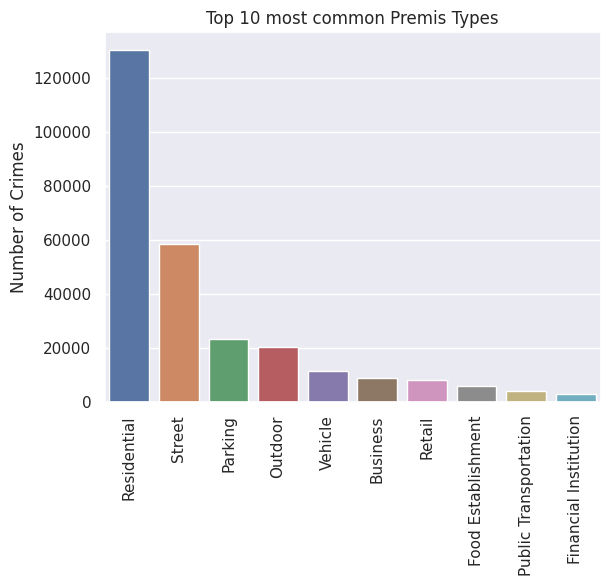

In [62]:
sns.barplot(x=df['Cleaned Premis Desc'].value_counts().head(10).index, y=df['Cleaned Premis Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
#plt.xlabel('the type of structure, vehicle, or location where the crime took place')
plt.title("Top 10 most common Premis Types")

plt.xticks(rotation=90)

plt.show()

#### "Weapon Used Cd"

In [63]:
df["Weapon Used Cd"].isnull().sum()

172722

I will use the same approach of mapping value to new categories as i've used earlier. With the aim of engineering more relevant, easy to read and understand categories. While also reducing redundancy.
The number of unique categories went from 77 to 21.

In [64]:
weapon_mapping = {
    'FOLDING KNIFE': 'Knife',
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Physical Force',
    'UNKNOWN WEAPON/OTHER WEAPON': 'Unknown',
    'SEMI-AUTOMATIC PISTOL': 'Firearm',
    'MACE/PEPPER SPRAY': 'Chemical Spray',
    'HAND GUN': 'Firearm',
    'PIPE/METAL PIPE': 'Blunt Instrument',
    'BLUNT INSTRUMENT': 'Blunt Instrument',
    'VERBAL THREAT': 'Threat',
    'CONCRETE BLOCK/BRICK': 'Blunt Instrument',
    'VEHICLE': 'Vehicle',
    'BOTTLE': 'Bottle',
    'UNKNOWN FIREARM': 'Firearm',
    'STRAIGHT RAZOR': 'Sharp Object',
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Knife',
    'FIRE': 'Fire',
    'HAMMER': 'Blunt Instrument',
    'STICK': 'Blunt Instrument',
    'PHYSICAL PRESENCE': 'Physical Force',
    'SIMULATED GUN': 'Firearm',
    'MACHETE': 'Knife',
    'OTHER FIREARM': 'Firearm',
    'KITCHEN KNIFE': 'Knife',
    'KNIFE WITH BLADE 6INCHES OR LESS': 'Knife',
    'OTHER KNIFE': 'Knife',
    'CLUB/BAT': 'Blunt Instrument',
    'BELT FLAILING INSTRUMENT/CHAIN': 'Blunt Instrument',
    'UNKNOWN TYPE CUTTING INSTRUMENT': 'Sharp Object',
    'ROCK/THROWN OBJECT': 'Thrown Object',
    'BOARD': 'Blunt Instrument',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Firearm',
    'SEMI-AUTOMATIC RIFLE': 'Firearm',
    'SCISSORS': 'Sharp Object',
    'OTHER CUTTING INSTRUMENT': 'Sharp Object',
    'RIFLE': 'Firearm',
    'ICE PICK': 'Sharp Object',
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'STUN GUN': 'Electric Shock',
    'GLASS': 'Sharp Object',
    'SWORD': 'Sharp Object',
    'REVOLVER': 'Firearm',
    'EXPLOXIVE DEVICE': 'Explosive',
    'RAZOR': 'Sharp Object',
    'AXE': 'Blunt Instrument',
    'SCREWDRIVER': 'Sharp Object',
    'SWITCH BLADE': 'Knife',
    'TIRE IRON': 'Blunt Instrument',
    'SHOTGUN': 'Firearm',
    'BRASS KNUCKLES': 'Blunt Instrument',
    'SCALDING LIQUID': 'Chemical',
    'FIXED OBJECT': 'Blunt Instrument',
    'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearm',
    'TOY GUN': 'Firearm (Toy)',
    'DOG/ANIMAL (SIC ANIMAL ON)': 'Animal',
    'CAUSTIC CHEMICAL/POISON': 'Chemical',
    'RAZOR BLADE': 'Sharp Object',
    'DIRK/DAGGER': 'Sharp Object',
    'ROPE/LIGATURE': 'Strangulation',
    'BOMB THREAT': 'Explosive',
    'CLEAVER': 'Knife',
    'LIQUOR/DRUGS': 'Substance',
    'SYRINGE': 'Sharp Object',
    'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearm',
    'DEMAND NOTE': 'Threat',
    'SAWED OFF RIFLE/SHOTGUN': 'Firearm',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'STARTER PISTOL/REVOLVER': 'Firearm',
    'BOW AND ARROW': 'Projectile Weapon',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
    'RELIC FIREARM': 'Firearm',
    'MARTIAL ARTS WEAPONS': 'Weapon',
    'BOWIE KNIFE': 'Knife',
    'ANTIQUE FIREARM': 'Firearm',
    'BLACKJACK': 'Blunt Instrument',
    'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm'
}

In [65]:
df['Cleaned Weapon Desc'] = df['Weapon Desc'].map(weapon_mapping)

In [66]:
df['Cleaned Weapon Desc'].value_counts()

Physical Force       66823
Firearm              14748
Unknown              12511
Threat                9624
Knife                 8282
Blunt Instrument      4822
Sharp Object          1616
Chemical Spray        1472
Vehicle               1327
Bottle                 953
Thrown Object          946
Fire                   165
Electric Shock         154
Chemical               147
Firearm (Toy)           70
Explosive               44
Substance               22
Animal                  21
Strangulation           16
Projectile Weapon        7
Weapon                   4
Name: Cleaned Weapon Desc, dtype: int64

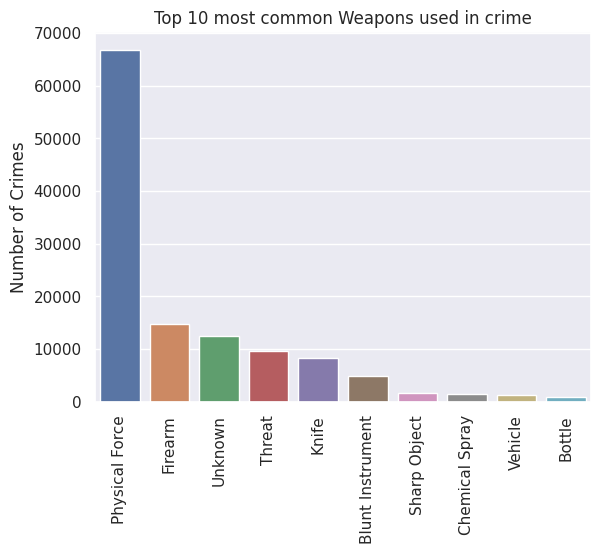

In [67]:
sns.barplot(x=df['Cleaned Weapon Desc'].value_counts().head(10).index, y=df['Cleaned Weapon Desc'].value_counts().head(10))

plt.ylabel("Number of Crimes")
#plt.xlabel('the type of structure, vehicle, or location where the crime took place')
plt.title("Top 10 most common Weapons used in crime")

plt.xticks(rotation=90)

plt.show()

#### "Status Desc"
which stands for Crime status.

In [68]:
df['Status Desc'].value_counts()

Invest Cont     231315
Adult Other      37531
Adult Arrest     26297
Juv Arrest         867
Juv Other          484
UNK                  2
Name: Status Desc, dtype: int64

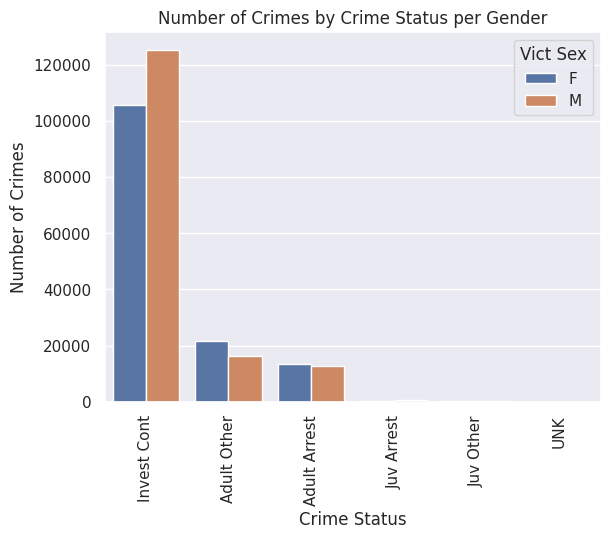

In [69]:
severity_counts = df['Status Desc'].value_counts().sort_values(ascending=False).index

sns.countplot(x="Status Desc", data=df, hue="Vict Sex", order=severity_counts)

plt.ylabel("Number of Crimes")
plt.xlabel("Crime Status")
plt.title("Number of Crimes by Crime Status per Gender")
plt.xticks(rotation=90)
plt.show()

The columns 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4' and 'Cross Street'. All contains a large amounts of missing data the represents more that 80% of the dataset. So i decided to get rid of them.

In [70]:
df[['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Cross Street']].isnull().sum()

Crm Cd 2        274855
Crm Cd 3        295765
Crm Cd 4        296496
Cross Street    248002
dtype: int64

In [71]:
df = df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Cross Street'], axis=1)
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Crm Cd 1,LOCATION,LAT,LON,diff_occ_rptd,hour,Cleaned Crm Cd Desc,Crime Severity,Cleaned Premis Desc,Cleaned Weapon Desc
0,201223780,2020-11-02,2020-11-02,11:20,12,77th Street,1256,210,ROBBERY,65,...,210.0,73RD ST,33.9737,-118.2827,0 days,11,Robbery,Felony,Outdoor,Knife
1,201911283,2020-06-23,2020-06-23,03:15,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,740.0,9700 WOODMAN AV,34.2467,-118.4479,0 days,03,Vandalism,Felony,Food Establishment,NaN
2,200806654,2020-02-28,2020-02-28,15:45,8,West LA,0885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,420.0,10400 W PICO BL,34.0463,-118.4171,0 days,15,Auto-Vehicle Theft,Petty,Parking,NaN
3,220912167,2022-08-03,2022-07-26,17:30,9,Van Nuys,0955,901,VIOLATION OF RESTRAINING ORDER,64,...,901.0,14200 MAGNOLIA BL,34.1668,-118.4445,8 days,17,Violating restraining order,Unknown,Residential,NaN
4,200817110,2020-12-02,2020-11-27,15:00,8,West LA,0802,662,"BUNCO, GRAND THEFT",73,...,662.0,15000 W SUNSET BL,34.0889,-118.5325,5 days,15,Bunco,Grand Theft,Residential,NaN
6,200918320,2020-12-10,2020-05-12,18:45,9,Van Nuys,0935,354,THEFT OF IDENTITY,40,...,354.0,14200 VICTORY BL,34.1867,-118.4427,212 days,18,Identity Theft,Felony,Food Establishment,NaN
7,202106961,2020-03-05,2020-03-05,02:30,21,Topanga,2145,330,BURGLARY FROM VEHICLE,22,...,330.0,6600 GLADE AV,34.1904,-118.6083,0 days,02,Auto-Vehicle Burglary,Felony,Parking,NaN
8,220808191,2022-04-12,2022-04-12,20:00,8,West LA,0829,626,INTIMATE PARTNER - SIMPLE ASSAULT,45,...,626.0,1200 WOODRUFF AV,34.0647,-118.4300,0 days,20,Domestic Violence,Simple Assault,Residential,Physical Force
9,230109590,2023-03-30,2023-03-30,03:00,1,Central,0119,624,BATTERY - SIMPLE ASSAULT,51,...,624.0,800 N ALAMEDA ST,34.0561,-118.2375,0 days,03,Battery,Simple Assault,Transportation,Physical Force
10,200100568,2020-01-27,2020-01-27,15:00,1,Central,0166,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,69,...,930.0,6TH,34.0428,-118.2461,0 days,15,Criminal Threats,Felony,Public Transportation,Unknown


#### "LOCATION"

In [72]:
df['LOCATION'].nunique()

48706

#### "LON" and "LAT" columns

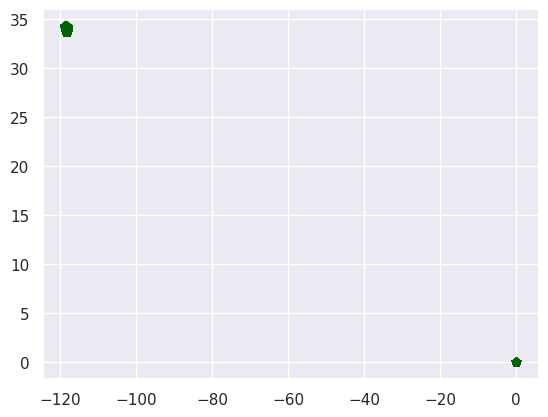

In [73]:
plt.scatter(x=df["LON"], y=df["LAT"], marker="p", c="darkgreen")
plt.show()

In [74]:
df[["LON", "LAT"]].describe()

,LON,LAT
count,296496.000000,296496.000000
mean,-117.995005,33.971495
std,6.533417,1.883997
min,-118.667600,0.000000
25%,-118.434000,34.014600
50%,-118.324200,34.059400
75%,-118.274100,34.166000
max,0.000000,34.334300


the columns 'LON' and 'LAT' seem to have some unreasonable values. like the column seem to have max values = 0.0, when the longtitude here is suposed to be a negative value. i will remove and check the data.

In [75]:
mask = df["LON"] > -118
df = df[~mask]

In [76]:
df[["LON", "LAT"]].describe()

,LON,LAT
count,295590.000000,295590.000000
mean,-118.356667,34.075620
std,0.105801,0.110466
min,-118.667600,33.706400
25%,-118.434300,34.015500
50%,-118.324600,34.059600
75%,-118.274800,34.166500
max,-118.155400,34.334300


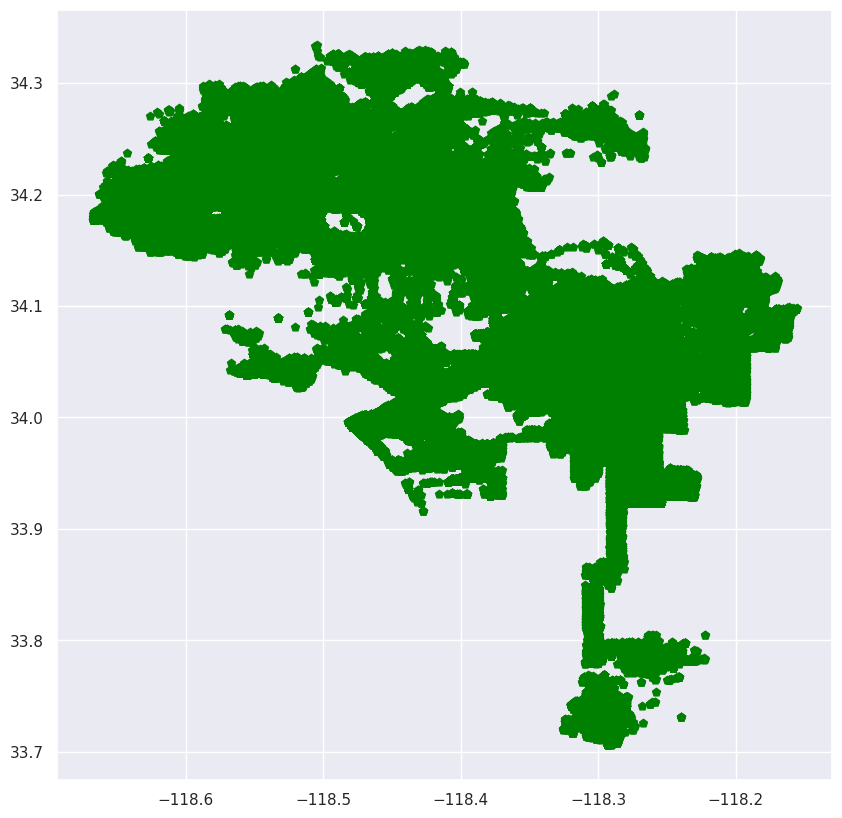

In [77]:
plt.figure(figsize=(10, 10))
plt.scatter(x=df["LON"], y=df["LAT"], marker="p", c="green")
plt.show()

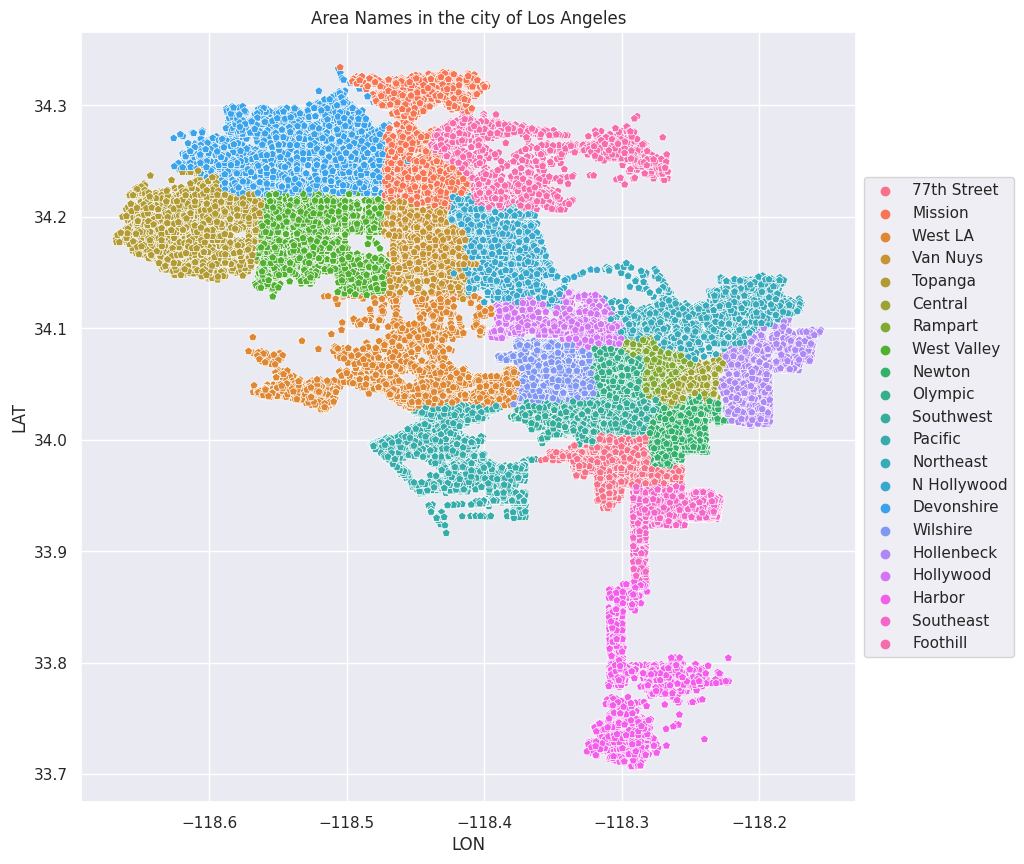

In [78]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df["LON"], y=df["LAT"], marker="p", hue=df["AREA NAME"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Area Names in the city of Los Angeles")
plt.show()

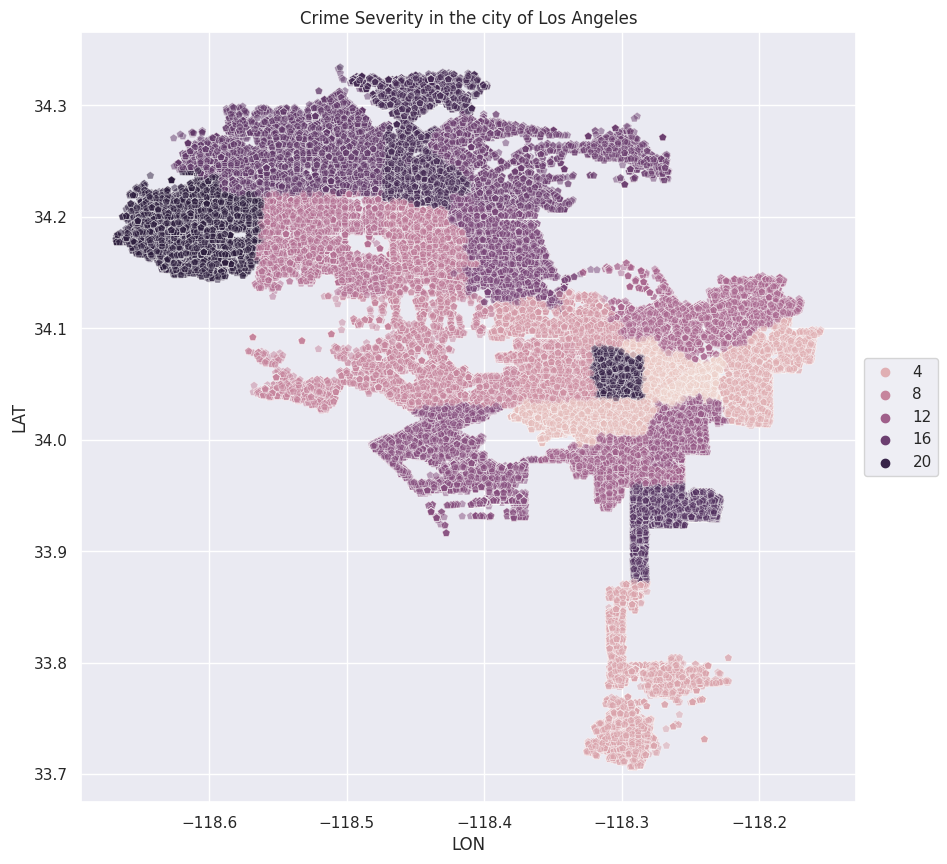

In [79]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df["LON"], y=df["LAT"], marker="p", hue=df["AREA"], alpha=.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Crime Severity in the city of Los Angeles")
plt.show()

#### New dataframe

In [80]:
df_new = df[['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'hour', 'diff_occ_rptd', 'AREA',  'AREA NAME',
            'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age', 'Vict Sex',
            'Vict Descent', 'Premis Cd', 'Premis Desc',  'Cleaned Premis Desc', 'Weapon Used Cd',
            'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

In [81]:
df_new = df_new.dropna(subset=['Crm Cd 1'], how='any')

In [82]:
df_new.isnull().sum()

DR_NO                       0
Date Rptd                   0
DATE OCC                    0
TIME OCC                    0
hour                        0
diff_occ_rptd               0
AREA                        0
AREA NAME                   0
Rpt Dist No                 0
Crm Cd                      0
Crm Cd Desc                 0
Cleaned Crm Cd Desc         0
Crime Severity              0
Vict Age                    0
Vict Sex                    0
Vict Descent                0
Premis Cd                   0
Premis Desc                 0
Cleaned Premis Desc         0
Weapon Used Cd         172219
Weapon Desc            172219
Cleaned Weapon Desc    172219
Status Desc                 0
Crm Cd 1                    0
LOCATION                    0
LAT                         0
LON                         0
dtype: int64

In [83]:
dataset = df[['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'hour', 'diff_occ_rptd', 'AREA',  'AREA NAME',
              'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age', 'Vict Sex',
              'Vict Descent', 'Premis Cd', 'Premis Desc',  'Cleaned Premis Desc', 'Weapon Used Cd',
              'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']]

In [84]:
column_names = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'hour', 'diff_occ_rptd', 'AREA',  'AREA NAME',
              'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Cleaned Crm Cd Desc', 'Crime Severity', 'Vict Age', 'Vict Sex',
              'Vict Descent', 'Premis Cd', 'Premis Desc',  'Cleaned Premis Desc', 'Weapon Used Cd',
              'Weapon Desc', 'Cleaned Weapon Desc', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON']

In [85]:
column_mapping = {
    'DR_NO': 'DR_NO',
    'Date Rptd': 'Reported_Date',
    'DATE OCC': 'Occurred_Date',
    'TIME OCC': 'Ocurred_Time',
    'hour': 'Hour',
    'diff_occ_rptd': 'diff_occ_rptd (hours)',
    'AREA': 'Area_Code',
    'AREA NAME': 'Area_Name',
    'Rpt Dist No': 'Rpt_Dist_No',
    'Crm Cd': 'Crime_Code',
    'Crm Cd Desc': 'Crime_Description',
    'Cleaned Crm Cd Desc': 'Cleaned_Crime_Description',
    'Crime Severity': 'Crime_Severity',
    'Vict Age': 'Victim_Age',
    'Vict Sex': 'Victim_Sex',
    'Vict Descent': 'Victim_Ethnicity',
    'Premis Cd': 'Premises_Code',
    'Premis Desc': 'Premises_Description',
    'Cleaned Premis Desc': 'Cleaned_Premises_Description',
    'Weapon Used Cd': 'Weapon_Used_Code',
    'Weapon Desc': 'Weapon_Description',
    'Cleaned Weapon Desc': 'Cleaned_Weapon_Description',
    'Status Desc': 'Status_Description',
    'Crm Cd 1': 'Crime_Code_1',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}

In [86]:
dataset.rename(columns=column_mapping, inplace=True)

#### ML_DF

In [88]:
ml_df = dataset.drop(["DR_NO", "Rpt_Dist_No", "Crime_Description", "Crime_Code", "Premises_Description", "Weapon_Used_Code", "Premises_Code", "Area_Code", "Weapon_Description", "Location", 'Reported_Date', 'Occurred_Date'], axis=1)

In [89]:
ml_df

,Ocurred_Time,Hour,diff_occ_rptd (hours),Area_Name,Cleaned_Crime_Description,Crime_Severity,Victim_Age,Victim_Sex,Victim_Ethnicity,Cleaned_Premises_Description,Cleaned_Weapon_Description,Status_Description,Crime_Code_1,Latitude,Longitude
0,11:20,11,0 days,77th Street,Robbery,Felony,65,F,H,Outdoor,Knife,Invest Cont,210.0,33.9737,-118.2827
1,03:15,03,0 days,Mission,Vandalism,Felony,51,M,O,Food Establishment,NaN,Invest Cont,740.0,34.2467,-118.4479
2,15:45,15,0 days,West LA,Auto-Vehicle Theft,Petty,38,F,W,Parking,NaN,Invest Cont,420.0,34.0463,-118.4171
3,17:30,17,8 days,Van Nuys,Violating restraining order,Unknown,64,M,H,Residential,NaN,Adult Other,901.0,34.1668,-118.4445
4,15:00,15,5 days,West LA,Bunco,Grand Theft,73,F,W,Residential,NaN,Invest Cont,662.0,34.0889,-118.5325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400139,13:00,13,0 days,Central,Assault,Aggravated Assault,48,M,W,Outdoor,Physical Force,Invest Cont,230.0,34.0488,-118.2500
400140,19:00,19,8 days,Wilshire,Burglary,Felony,27,F,A,Parking,NaN,Invest Cont,310.0,34.0649,-118.3451
400142,19:00,19,1 days,Olympic,Vandalism,Felony,27,F,H,Vehicle,NaN,Invest Cont,740.0,34.0598,-118.2891
400143,06:30,06,0 days,Southeast,Robbery,Attempted,37,M,H,Street,Unknown,Invest Cont,220.0,33.9580,-118.2894


In [94]:
col_names = ml_df.columns

In [95]:
print(col_names)

Index(['Ocurred_Time', 'Hour', 'diff_occ_rptd (hours)', 'Area_Name',
       'Cleaned_Crime_Description', 'Crime_Severity', 'Victim_Age',
       'Victim_Sex', 'Victim_Ethnicity', 'Cleaned_Premises_Description',
       'Cleaned_Weapon_Description', 'Status_Description', 'Crime_Code_1',
       'Latitude', 'Longitude'],
      dtype='object')


#### "Cleaned_Weapon_Description":
the "Cleaned_Weapon_Description" contains a lot of missing data, so i need to know why and i have a number of assumtipns to check for. Like the crime not involving a weapon.

In [96]:
test = ml_df[ml_df['Cleaned_Weapon_Description'].isnull()]

As we can see from this graph, it is safe to assume that enteries with mssing data in the "Cleaned_Weapon_Description" are crimes that don't involve weapons. So i'm going to create a new column to account fot this new insight, this category will be name "Unknown".
The problem is that i already have a category in the "Cleaned_Weapon_Description" called unknown that holds includes values i failed to identify as a weapon.
I've decided to add this category to the "Unknown" category.

<Axes: >

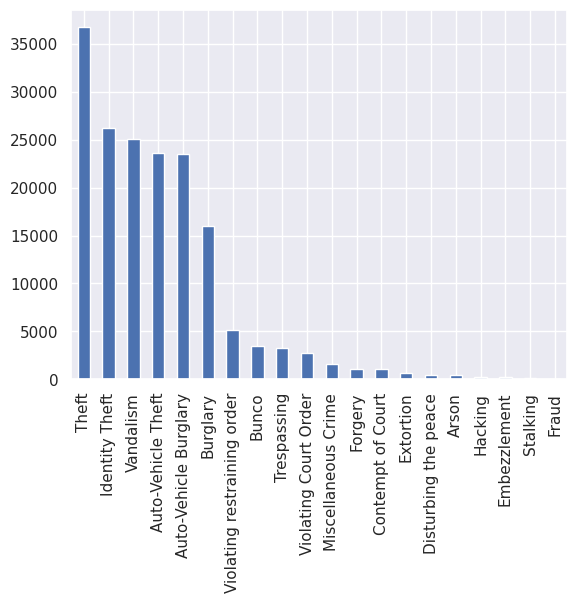

In [97]:
test.Cleaned_Crime_Description.value_counts().head(20).plot(kind='bar')

<Axes: >

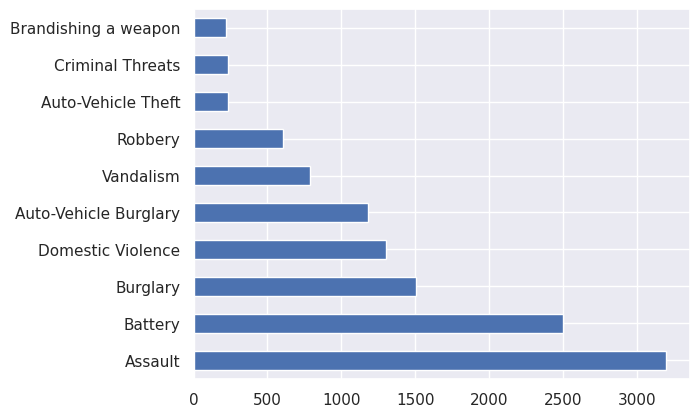

In [98]:
ml_df[ml_df['Cleaned_Weapon_Description'] == 'Unknown']['Cleaned_Crime_Description'].value_counts().head(10).plot(kind='barh')

In [99]:
ml_df['Cleaned_Weapon_Description'].value_counts()

Physical Force       66498
Firearm              14733
Unknown              12481
Threat                9622
Knife                 8270
Blunt Instrument      4815
Sharp Object          1613
Chemical Spray        1470
Vehicle               1327
Bottle                 953
Thrown Object          944
Fire                   158
Electric Shock         154
Chemical               147
Firearm (Toy)           70
Explosive               44
Substance               22
Animal                  21
Strangulation           16
Projectile Weapon        7
Weapon                   4
Name: Cleaned_Weapon_Description, dtype: int64

In [100]:
ml_df['Cleaned_Weapon_Description'] = ml_df['Cleaned_Weapon_Description'].fillna('Unknown')

In [101]:
ml_df['Cleaned_Weapon_Description'].value_counts()

Unknown              184702
Physical Force        66498
Firearm               14733
Threat                 9622
Knife                  8270
Blunt Instrument       4815
Sharp Object           1613
Chemical Spray         1470
Vehicle                1327
Bottle                  953
Thrown Object           944
Fire                    158
Electric Shock          154
Chemical                147
Firearm (Toy)            70
Explosive                44
Substance                22
Animal                   21
Strangulation            16
Projectile Weapon         7
Weapon                    4
Name: Cleaned_Weapon_Description, dtype: int64

Crime_Code_1 contains 2 missing values i will just drop them

In [102]:
ml_df = ml_df.dropna(subset=["Crime_Code_1"])

Some categorical values in the dataset have extremely low number of enteries so i will drop them

In [117]:
ml_df["Cleaned_Crime_Description"].value_counts()

Theft                                                       38432
Battery                                                     32366
Vandalism                                                   27555
Identity Theft                                              26210
Domestic Violence                                           26098
Auto-Vehicle Burglary                                       24835
Assault                                                     24489
Auto-Vehicle Theft                                          23994
Burglary                                                    18040
Robbery                                                     13150
Criminal Threats                                             8485
Brandishing a weapon                                         6261
Violating restraining order                                  5464
Bunco                                                        3524
Trespassing                                                  3365
Violating 

There categories in the "Cleaned_Crime_Description" that have less than 10 entries so im going to remove it.

In [118]:
mask = ml_df["Cleaned_Crime_Description"].isin(["Lynching", "Bigamy", "FIREARMS EMERGENCY PROTECTIVE ORDER", "Restraining Order", "Disrupt School", "Bribery", "Blocking Door Induction", "Conspiracy", "Manslaughter", "REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)", "Weapon Possesion"])

ml_df = ml_df[~mask]

I will do the same for the "Cleaned_Premises_Description" column

In [121]:
col_list = ["Funeral Services", "Waste Management", "Energy Plant", "Technology"]
mask2 = ml_df["Cleaned_Premises_Description"].isin(col_list)

In [122]:
ml_df = ml_df[~mask2]

In [123]:
ml_df["Cleaned_Premises_Description"].value_counts()

Residential              130149
Street                    58420
Parking                   23258
Outdoor                   20331
Vehicle                   11550
Business                   8711
Retail                     8002
Food Establishment         5779
Public Transportation      3909
Financial Institution      2940
Lodging                    2764
Other                      2351
Storage                    2241
Educational                2220
Healthcare                 2214
Entertainment              2145
Gas Station                1606
Transportation             1596
Cyberspace                  879
Office                      713
Automotive                  673
Mail Services               578
Religious                   470
Construction                379
Beauty                      339
Public Services             268
Government                  262
Online                      260
Recreation                  122
Delivery Service             91
Public Restroom              76
Manufact

In [125]:
col_list = ["Projectile Weapon", "Weapon"]
mask3 = ml_df["Cleaned_Weapon_Description"].isin(col_list)

In [126]:
ml_df = ml_df[~mask3]

In [127]:
ml_df["Cleaned_Weapon_Description"].value_counts()

Unknown             184653
Physical Force       66494
Firearm              14730
Threat                9620
Knife                 8270
Blunt Instrument      4815
Sharp Object          1613
Chemical Spray        1470
Vehicle               1327
Bottle                 953
Thrown Object          944
Fire                   158
Electric Shock         154
Chemical               147
Firearm (Toy)           68
Explosive               40
Animal                  21
Substance               20
Strangulation           16
Name: Cleaned_Weapon_Description, dtype: int64

In [128]:
ml_df["Status_Description"].value_counts()

Invest Cont     230358
Adult Other      37520
Adult Arrest     26282
Juv Arrest         867
Juv Other          484
UNK                  2
Name: Status_Description, dtype: int64

In [129]:
col_list = ["UNK"]
mask4 = ml_df["Status_Description"].isin(col_list)

In [130]:
ml_df = ml_df[~mask4]

In [131]:
ml_df["Status_Description"].value_counts()

Invest Cont     230358
Adult Other      37520
Adult Arrest     26282
Juv Arrest         867
Juv Other          484
Name: Status_Description, dtype: int64

## Time for some machine learning preprocessing

## Machine Leaning Stage:

After preparing and cleaning the dataset, it is time to outline a value for the model to predict. I've decided to predict "Crime Severity" column of the dataset, which i created earlier from the other columns. But instead of creating a multiclass prediction model to predict between the 8 values in that column ['Petty', 'GrandTheft', 'Unknown' ...]. I will be using a binary classification model to predict whether a crime is a felony or not.
This mainly due to 3 reasons:

- Technical and resources considerations.
- Felony crimes quite common in the dataset, accounting for nearly 60% of the crime severit classes.
- Felony crimes are more likely to be reported and investigated and considered more serious in general.

#### Importing the necessary libraries.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#### Importing the dataset

In [137]:
ml_df = pd.read_csv('/content/drive/MyDrive/Analyzing Crime Data/ml_df_new.csv')
ml_df.head()

,Unnamed: 0,Ocurred_Time,Hour,diff_occ_rptd (hours),Area_Name,Cleaned_Crime_Description,Crime_Severity,Victim_Age,Victim_Sex,Victim_Ethnicity,Cleaned_Premises_Description,Cleaned_Weapon_Description,Status_Description,Crime_Code_1,Latitude,Longitude
0,0,11:20,11,0 days,77th Street,Robbery,Felony,65,F,H,Outdoor,Knife,Invest Cont,210.0,33.9737,-118.2827
1,1,03:15,3,0 days,Mission,Vandalism,Felony,51,M,O,Food Establishment,Unknown,Invest Cont,740.0,34.2467,-118.4479
2,2,15:45,15,0 days,West LA,Auto-Vehicle Theft,Petty,38,F,W,Parking,Unknown,Invest Cont,420.0,34.0463,-118.4171
3,3,17:30,17,8 days,Van Nuys,Violating restraining order,Unknown,64,M,H,Residential,Unknown,Adult Other,901.0,34.1668,-118.4445
4,4,15:00,15,5 days,West LA,Bunco,Grand Theft,73,F,W,Residential,Unknown,Invest Cont,662.0,34.0889,-118.5325


#### Scaling the numeric values in the dataset.

The reason i went with MinMaxScaler instead of other more commonly used methods of scaling, is because the dataset will grow quite large and i plan on using SelectKbest with Chi2 to reduce the size of the dataset.

In [ ]:
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(ml_df['Victim_Age'].values.reshape(-1, 1))
age_scaled = pd.DataFrame(age_scaled, columns=['Scaled_Victim_Age'])

In [ ]:
lat_scaled = scaler.fit_transform(ml_df['Latitude'].values.reshape(-1, 1))
lat_scaled = pd.DataFrame(lat_scaled, columns=['Scaled_Latitude'])

In [ ]:
lon_scaled = scaler.fit_transform(ml_df['Longitude'].values.reshape(-1, 1))
lon_scaled = pd.DataFrame(lon_scaled, columns=['Scaled_Longitude'])

In [ ]:
ml_df = pd.concat([ml_df, age_scaled, lat_scaled, lon_scaled], axis=1)

#### Cleaning the dataset

In [ ]:
ml_df.Cleaned_Weapon_Description = ml_df.Cleaned_Weapon_Description.replace('Vehicle', 'Vehicle_Wea')

In [ ]:
ml_df.rename(columns={'diff_occ_rptd (hours)': 'diff_occ_rptd (days)'}, inplace=True)

In [ ]:
ml_df['diff_occ_rptd (days)'] = ml_df['diff_occ_rptd (days)'].str.strip('days')

In [ ]:
ml_df['diff_occ_rptd (days)']  = ml_df['diff_occ_rptd (days)'].astype(int)

#### Getting rid of useless or redundent columns.

In [ ]:
ml_df = ml_df.drop(['Victim_Age', 'Ocurred_Time', 'Unnamed: 0', 'Crime_Code_1', 'Latitude', 'Longitude'], axis=1)

In [ ]:
ml_df.head()

#### Encoding Categorical Variables.

In [ ]:
crime_desc_enc = pd.get_dummies(ml_df['Cleaned_Crime_Description'], drop_first=True)

In [ ]:
vict_sex_enc = pd.get_dummies(ml_df['Victim_Sex'], drop_first=True)

In [ ]:
vict_eth_enc = pd.get_dummies(ml_df['Victim_Ethnicity'], drop_first=True)

In [ ]:
prem_desc_enc = pd.get_dummies(ml_df['Cleaned_Premises_Description'], drop_first=True)

In [ ]:
wea_desc_enc = pd.get_dummies(ml_df["Cleaned_Weapon_Description"], drop_first=True)

In [ ]:
status_desc_enc = pd.get_dummies(ml_df["Status_Description"], drop_first=True)

In [ ]:
hour_enc = pd.get_dummies(ml_df['Hour'], drop_first=True)

In [ ]:
area_enc = pd.get_dummies(ml_df['Area_Name'], drop_first=True)

In [ ]:
cols = ml_df[["diff_occ_rptd (days)", "Crime_Severity", "Scaled_Victim_Age", "Scaled_Latitude", "Scaled_Longitude"]]

In [ ]:
#ml_df["Crime_Code_1"] = ml_df["Crime_Code_1"].astype(int)

In [ ]:
ml_df = pd.concat([cols, crime_desc_enc, hour_enc, area_enc, vict_sex_enc, vict_eth_enc, prem_desc_enc, wea_desc_enc, status_desc_enc], axis=1)

In [ ]:
ml_df.head()

,diff_occ_rptd (days),Crime_Severity,Scaled_Victim_Age,Scaled_Latitude,Scaled_Longitude,Arson,Assault,Auto-Vehicle Burglary,Auto-Vehicle Theft,Battery,Brandishing a weapon,Bunco,Burglary,Contempt of Court,Contributing,Counterfitting,Criminal Threats,Defrauding an Innkeeper,Dishonest Employee,Disturbing the peace,Domestic Violence,Driving without owner conset,Embezzlement,Extortion,False Imprisonment,False report,Firearm Discharge,Forgery,Fraud,Hacking,Homicide,Human Trafficking,Identity Theft,Illegal Dumping,Kidnapping,Miscellaneous Crime,Prostitution,Reckless Driving,Resisting Arrest,Robbery,Sexual Assault,Shooting at an inhabited Dwelling,Shooting at an occupied Vehicle,Stalking,Theft,Throwing Objects at moving Vehicles,Trespassing,Vandalism,Violating Court Order,Violating restraining order,traffic infraction,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,Northeast,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire,M,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z,Automotive,Beauty,Business,Childcare,Construction,Cyberspace,Delivery Service,Educational,Entertainment,Financial Institution,Food Establishment,Gas Station,Government,Healthcare,Infrastructure,Lodging,Mail Services,Manufacturing,Marina,Office,Online,Other,Outdoor,Parking,Public Restroom,Public Services,Public Transportation,Recreation,Recycling,Religious,Residential,Retail,Storage,Street,Telecommunication,Transportation,Vehicle,Blunt Instrument,Bottle,Chemical,Chemical Spray,Electric Shock,Explosive,Fire,Firearm,Firearm (Toy),Knife,Physical Force,Sharp Object,Strangulation,Substance,Threat,Thrown Object,Unknown,Vehicle_Wea,Adult Other,Invest Cont,Juv Arrest,Juv Other
0,0,Felony,0.649485,0.425705,0.751464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,Felony,0.505155,0.860487,0.428934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,Petty,0.371134,0.541328,0.489067,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,8,Unknown,0.639175,0.733238,0.435572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,5,Grand Theft,0.731959,0.609173,0.263764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
# Datset has grown quite large with 172 columns
ml_df.shape

(295511, 172)

#### Encoding the target variable.

In [ ]:
ml_df["Crime_Sev_Enc"] = ml_df["Crime_Severity"].apply(lambda x: 1 if x == 'Felony' else 0)

In [ ]:
ml_df["Crime_Sev_Enc"].value_counts()

0    175201
1    120310
Name: Crime_Sev_Enc, dtype: int64

In [ ]:
ml_df = ml_df.drop("Crime_Severity", axis=1)

This Dataset is too large for my machine to handle, so I will be using the following code to reduce the size of the dataset. Since the target variable is a categorical variable, I will first sample the data using stratified sampling technique.

In [ ]:
ml_df.Crime_Sev_Enc.value_counts(normalize=True) * 100

0    59.287472
1    40.712528
Name: Crime_Sev_Enc, dtype: float64

In [ ]:
# Test drive on a smaller chunk of the dataset
#ml_df_sam = ml_df.groupby(["Crime_Sev_Enc"]).sample(frac=0.5, random_state=42)

In [ ]:
ml_df_sam = ml_df

The distribution of the target variable in the reduced dataset is shown below. It matches the distribution of the original dataset.

In [ ]:
ml_df_sam.Crime_Sev_Enc.value_counts(normalize=True) * 100

0    59.287472
1    40.712528
Name: Crime_Sev_Enc, dtype: float64

## Splitting the dataset and Training the model.

In this stage i will be splitting the dataset into training and testing sets to avoid overfitting, then i will train the model on two of the most common classification algorithms: Logistic Regression and XGBoostClassifier.
First i will simple versions of those models then i will use finer tuned versions of them.

### Splitting the dataset

In [ ]:
X = ml_df_sam.drop('Crime_Sev_Enc', axis=1)
y = ml_df_sam['Crime_Sev_Enc']

In [ ]:
col_names = X.columns

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### **Addressing Class Imbalance:**

In [ ]:
print(ml_df_sam['Crime_Sev_Enc'].value_counts(normalize=True) * 100)

0    59.287472
1    40.712528
Name: Crime_Sev_Enc, dtype: float64


Now i will correct for class imbalance using SMOTE.

SMOTE stands for "Synthetic Minority Over-sampling Technique." It is a technique used in machine learning and data preprocessing to address class imbalance in a dataset, particularly in classification problems.

In many real-world datasets, you may encounter situations where one class (the majority class) significantly outnumbers another class (the minority class). Class imbalance can lead to biased model training, where the model performs well on the majority class but poorly on the minority class.

SMOTE helps mitigate this problem by oversampling the minority class. It works by generating synthetic examples for the minority class based on the existing data. Here's how SMOTE typically works:

1. For each example in the minority class, SMOTE selects its k nearest neighbors from the minority class. The value of k is a user-defined parameter.

2. SMOTE then generates synthetic examples by interpolating between the selected example and its neighbors. It creates new examples along the line segments connecting the original example to its neighbors.

3. These synthetic examples are added to the minority class, effectively increasing the number of minority class samples in the dataset.

By oversampling the minority class in this way, SMOTE helps balance the class distribution, making it more even and reducing the risk of model bias towards the majority class. This, in turn, can lead to improved model performance, especially in scenarios where the minority class is of particular interest or importance.

SMOTE is a valuable tool for addressing class imbalance issues and is widely used in machine learning when dealing with imbalanced datasets.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Logistic Regression with SMOTE:

In [ ]:
# Instantiate a LogisticRegression model
model_log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)


model_log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model_log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9521005701910225
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     35041
           1       0.91      0.98      0.94     24062

    accuracy                           0.95     59103
   macro avg       0.95      0.96      0.95     59103
weighted avg       0.95      0.95      0.95     59103



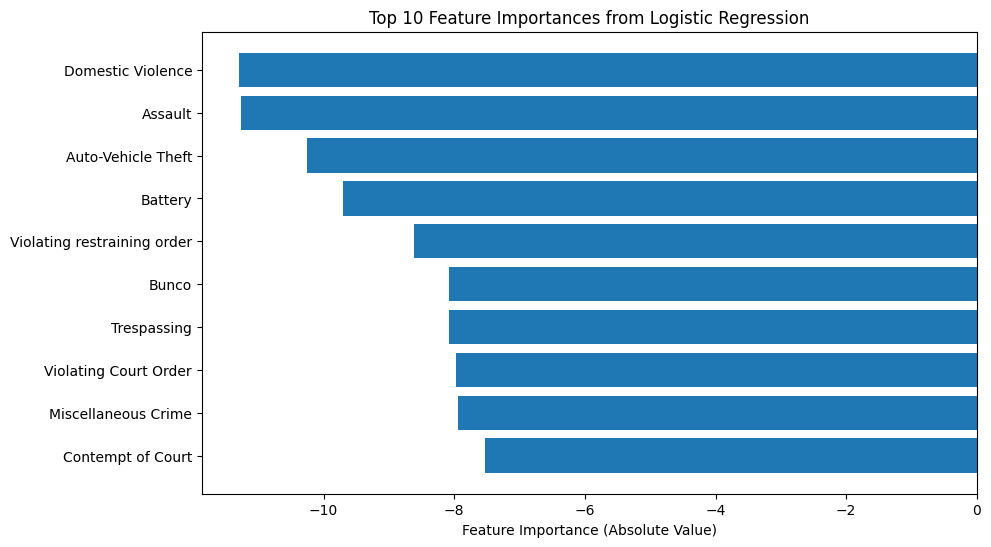

In [ ]:
# Get feature importances from the model (coefficients in this case)
feature_importance = model_log_reg.coef_[0]

# Get the names of your feature columns
feature_names = X_train.columns

# Sort feature importances by absolute value in descending order
sorted_idx = np.argsort(abs(feature_importance))[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the top N most important features
top_n = 10  # Adjust to the number of features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(np.arange(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance (Absolute Value)')
plt.title('Top {} Feature Importances from Logistic Regression'.format(top_n))
plt.gca().invert_yaxis()
plt.show()

### XGBoostClassifier with SMOTE:

In [ ]:
# Create an XGBoost classifier model
xgb = XGBClassifier()

# Train the model on the training data
xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9534203001539685
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     35041
           1       0.91      0.98      0.95     24062

    accuracy                           0.95     59103
   macro avg       0.95      0.96      0.95     59103
weighted avg       0.96      0.95      0.95     59103



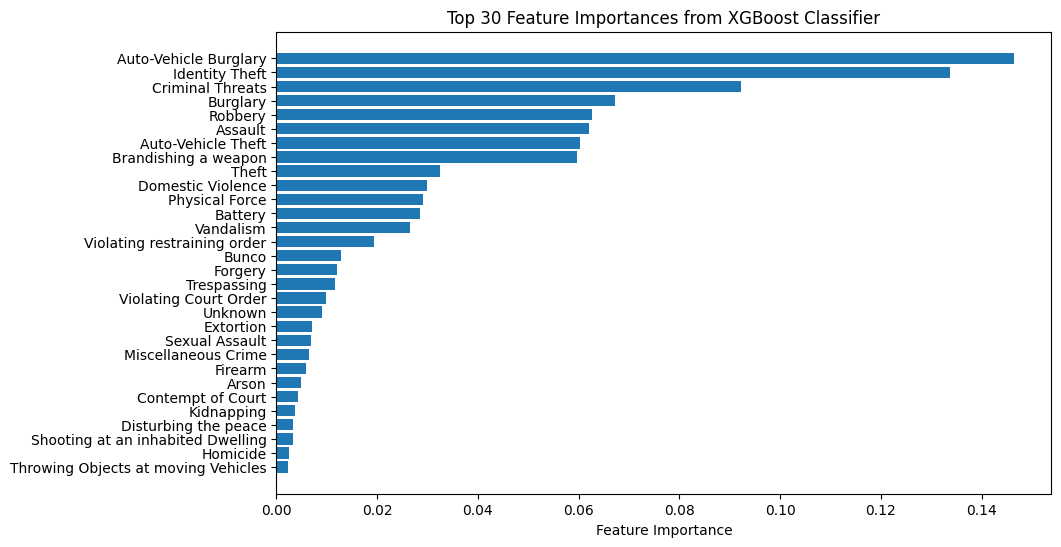

In [ ]:
# Get feature importances from the model
feature_importance = xgb.feature_importances_

# Get the names of your feature columns
feature_names = X_train.columns  # Replace with the actual names of your features

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the top N most important features
top_n = 30  # Adjust to the number of features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(np.arange(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances from XGBoost Classifier'.format(top_n))
plt.gca().invert_yaxis()
plt.show()

Note: Models seem to perform better after applying SMOTE.

#### Feature Selection:
The dataset is quite large, so i will be using some feature selection techniques to reduce the size of the dataset. I'm doing this so i can run more complex and highly tunned models faster to obtain the most accurate predictions.
The reason to why i decided to limit the number of features to 30 is at this point just a random choice and i might increase or decrease it in the future.

In [ ]:
# Fit and transform your feature the data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Apply feature selection on the scaled data
sk = SelectKBest(chi2, k=60)
which_selected = sk.fit(X_train_resampled_scaled, y_train_resampled)

# Get the selected feature indices
selected_feature_indices = sk.get_support(indices=True)

In [ ]:
# Extract the selected features
selected_X_train_resampled = X_train_resampled_scaled[:, selected_feature_indices]

#### New Data frame with reduced feature and corrected class imbalance.

In [ ]:
# Create a dataframe from the selected features.
df_selected_features = pd.DataFrame(selected_X_train_resampled, columns=X_train_resampled.columns[selected_feature_indices])
df_selected_features.head()

,diff_occ_rptd (days),Arson,Assault,Auto-Vehicle Burglary,Auto-Vehicle Theft,Battery,Brandishing a weapon,Bunco,Burglary,Contempt of Court,Criminal Threats,Disturbing the peace,Domestic Violence,Extortion,Firearm Discharge,Forgery,Hacking,Homicide,Identity Theft,Miscellaneous Crime,Robbery,Sexual Assault,Shooting at an inhabited Dwelling,Theft,Throwing Objects at moving Vehicles,Trespassing,Vandalism,Violating Court Order,Violating restraining order,11,13,14,15,16,Harbor,H,Cyberspace,Educational,Entertainment,Financial Institution,Food Establishment,Healthcare,Lodging,Outdoor,Parking,Public Transportation,Retail,Storage,Transportation,Vehicle,Blunt Instrument,Bottle,Chemical Spray,Firearm,Physical Force,Threat,Unknown,Vehicle_Wea,Adult Other,Invest Cont
0,0.000786,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.064465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.002358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
new_df = pd.concat([df_selected_features, y_train_resampled], axis=1)

### Split and train the model on a new dataset but this time i will be using more complex and highly tunned models to obtain more accurate predictions.

In [ ]:
new_X = new_df.drop('Crime_Sev_Enc', axis=1)
new_y = new_df['Crime_Sev_Enc'].values

In [ ]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

### Final Logistic Regression model: 95.6% Accuracy

#### Fitting and training the model

In [ ]:
# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': np.arange(0.01, 1.01, 0.01),  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']  # Solver for optimization
}

# Create GridSearchCV object with your pipeline and hyperparameter grid
grid_logreg = RandomizedSearchCV(estimator=model_log_reg, param_distributions=param_grid, cv=5, scoring='accuracy', error_score='raise')

# Fit the grid search to your data
grid_logreg.fit(X_train_sel, y_train_sel)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=LogisticRegression(max_iter=10000),
                   param_distributions={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.4...52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

#### Obtaining best results and params

In [ ]:
# Get the best hyperparameters
best_params = grid_logreg.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model tuned hyperparameters
best_log = grid_logreg.best_estimator_

# Evaluate the best model on test data
y_pred_log = best_log.predict(X_test_sel)
accuracy = accuracy_score(y_test_sel, y_pred_log)
print(f"Accuracy on Test Data: {accuracy}")

Best Hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 0.37}
Accuracy on Test Data: 0.956906392694064


#### Ploting the results

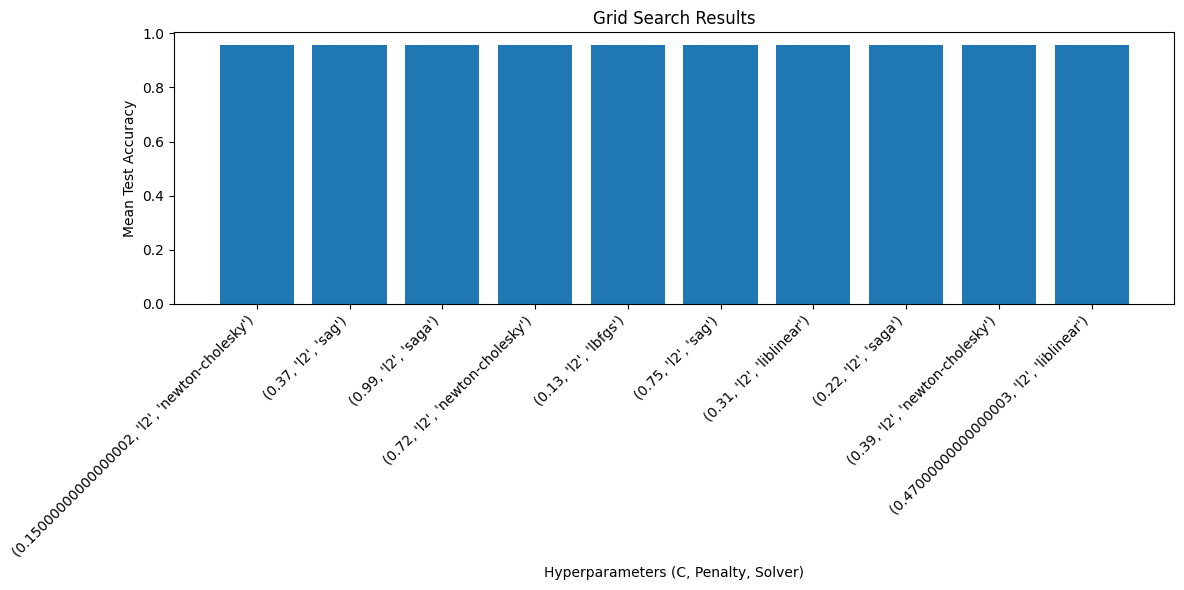

In [ ]:
# Get the best hyperparameters
results = grid_logreg.cv_results_
param_combinations = list(zip(results['param_C'], results['param_penalty'], results['param_solver']))
scores = results['mean_test_score']

# Plot the accuracy scores for different hyperparameter combinations
plt.figure(figsize=(12, 6))
plt.bar(range(len(param_combinations)), scores)
plt.xticks(range(len(param_combinations)), param_combinations, rotation=45, ha="right")
plt.xlabel("Hyperparameters (C, Penalty, Solver)")
plt.ylabel("Mean Test Accuracy")
plt.title("Grid Search Results")
plt.tight_layout()
plt.show()

#### Print classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     28023
           1       0.93      0.99      0.96     28041

    accuracy                           0.96     56064
   macro avg       0.96      0.96      0.96     56064
weighted avg       0.96      0.96      0.96     56064



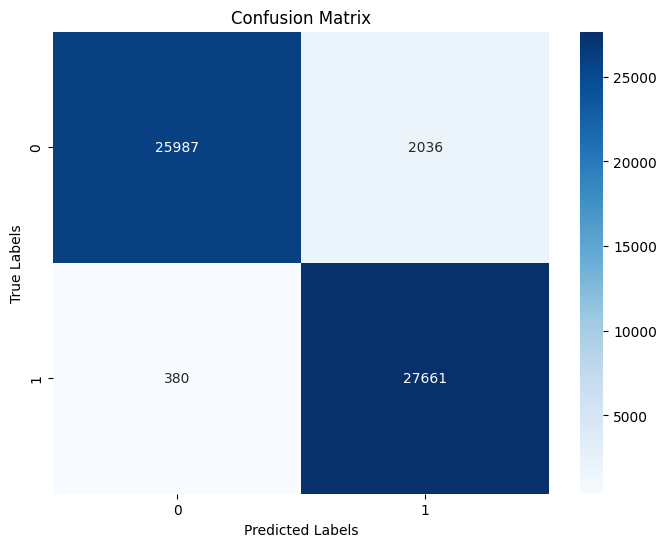

In [ ]:
# Generate a classification report
report = classification_report(y_test_sel, y_pred_log)
print(report)

# Plot a confusion matrix
cm = confusion_matrix(y_test_sel, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Final XGBClassifier model: 95.7% Accuracy

##### Fitting and training the model

In [ ]:
np.random.seed(42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'max_depth': np.arange(1, 11, 1),  # Maximum depth of each tree
    'learning_rate': np.arange(0.0,1.001, 0.001),  # Learning rate
    'subsample': np.arange(0.0,1.001, 0.001),  # Fraction of samples used for training each tree
    'colsample_bytree': np.arange(0.0,1.001, 0.001),  # Fraction of features used for training each tree
}

# Create GridSearchCV object
grid_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_xgb.fit(X_train_sel, y_train_sel)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
                                        'learning_rate': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': [100, 200, 300],
                                        'subsample': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])},
                   scoring='accuracy')

#### Obtaining best results and params

In [ ]:
# Get the best hyperparameters
best_params = grid_xgb.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = grid_xgb.best_estimator_

Best Hyperparameters: {'subsample': 0.075, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.08700000000000001, 'colsample_bytree': 0.971}


#### Extracing the results

In [ ]:
# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test_sel)

# Calculate accuracy
accuracy = accuracy_score(y_test_sel, y_pred)
print(f"Accuracy on Test Data: {accuracy}")

Accuracy on Test Data: 0.9575485159817352


#### Ploting the results

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     28023
           1       0.93      0.99      0.96     28041

    accuracy                           0.96     56064
   macro avg       0.96      0.96      0.96     56064
weighted avg       0.96      0.96      0.96     56064



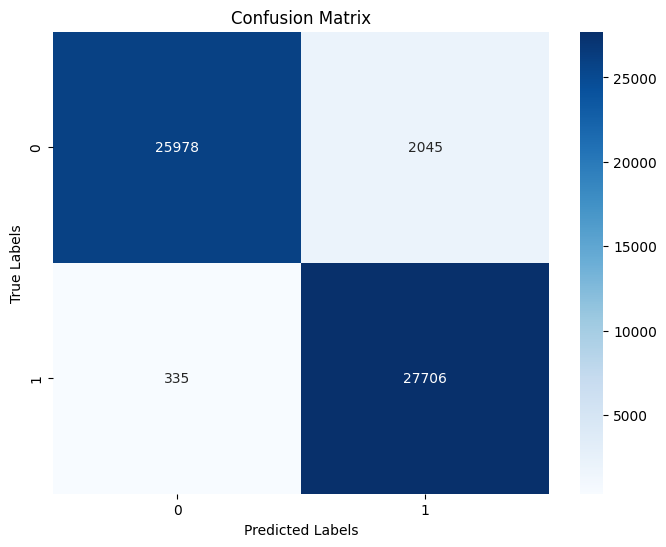

In [ ]:
# Generate a classification report
report = classification_report(y_test_sel, y_pred)
print(report)

# Plot a confusion matrix
cm = confusion_matrix(y_test_sel, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Plotting the features importance:

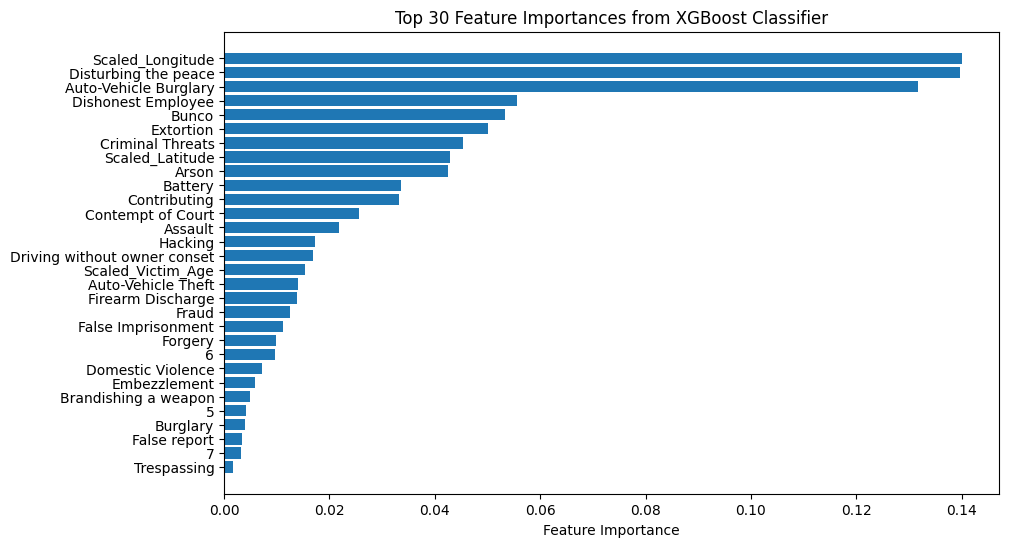

In [ ]:
# Get feature importances from the model
feature_importance = best_xgb_model.feature_importances_

# Get the names of your feature columns
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the top N most important features
top_n = 30  # Adjust to the number of features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(np.arange(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances from XGBoost Classifier'.format(top_n))
plt.gca().invert_yaxis()
plt.show()

## Conclusion:

XGBClassifier performed better by having achievied higher accuracy score and lower type 1 and type 2 errors.

## Further considerations:

- Different approaches like Deep Learning.
- Use different feature selection techniques.
- Use different models to solve this problem.
- Use different scaling methods on numerical columns.
- Solve a different issue. Like Multiclass classifier to either predict crime severity or area code where the crime took place.